In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from seaborn import countplot, axes_style
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300
from scipy import stats
import re
from matplotlib.pyplot import figure, show

In [2]:
#Load the given csv file as dataframe and check the number of columns and rows in the dataframe obtained
app_data = pd.read_csv('C:/Users/sakusuma/Desktop/pgdds/EDA Case Study/Sai EDA Asg/application_data.csv')
print(app_data.shape)

(307511, 122)


In [3]:
#Understanding the dataframe app_data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Further insights on the dataframe app_data to understand how the data is spread 
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
#To check the datatypes of the columns in dataframe app_data
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
# To check if the dataframe 'app_data' has any null values in columns
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# To identify the percentage of the null(NA) values in each column in the dataframe 'app_data'.
(round(app_data.isnull().sum()/len(app_data.index), 2)*100).sort_values(ascending=True)

SK_ID_CURR                       0.0
REG_REGION_NOT_WORK_REGION       0.0
LIVE_REGION_NOT_WORK_REGION      0.0
REG_CITY_NOT_LIVE_CITY           0.0
REG_CITY_NOT_WORK_CITY           0.0
LIVE_CITY_NOT_WORK_CITY          0.0
ORGANIZATION_TYPE                0.0
EXT_SOURCE_2                     0.0
FLAG_DOCUMENT_21                 0.0
FLAG_DOCUMENT_20                 0.0
FLAG_DOCUMENT_19                 0.0
FLAG_DOCUMENT_18                 0.0
FLAG_DOCUMENT_17                 0.0
FLAG_DOCUMENT_16                 0.0
FLAG_DOCUMENT_15                 0.0
DEF_30_CNT_SOCIAL_CIRCLE         0.0
FLAG_DOCUMENT_14                 0.0
FLAG_DOCUMENT_12                 0.0
FLAG_DOCUMENT_11                 0.0
FLAG_DOCUMENT_10                 0.0
FLAG_DOCUMENT_9                  0.0
FLAG_DOCUMENT_8                  0.0
FLAG_DOCUMENT_7                  0.0
FLAG_DOCUMENT_6                  0.0
FLAG_DOCUMENT_5                  0.0
FLAG_DOCUMENT_4                  0.0
FLAG_DOCUMENT_3                  0.0
F

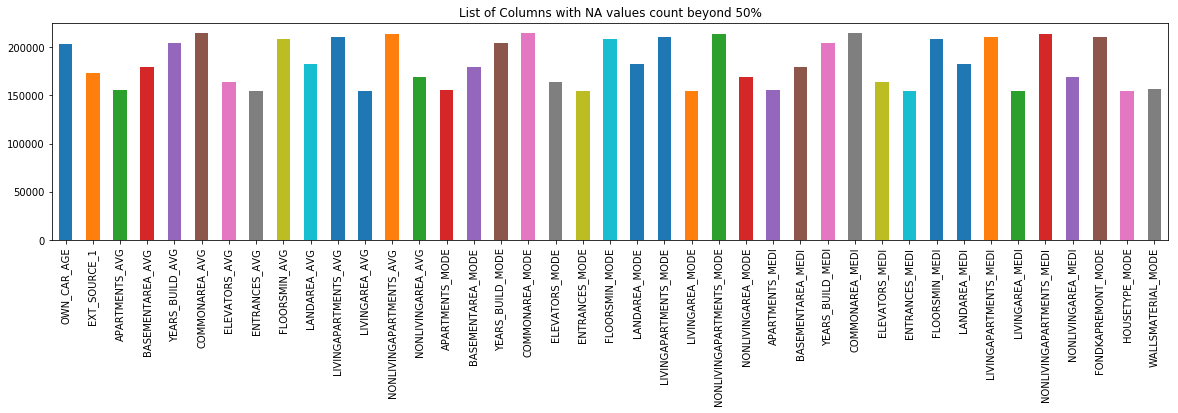

In [8]:
# Identify the coulmns that has null values beyond 50%
columns_NA = app_data.isnull().sum()
columns_NA = columns_NA[columns_NA.values >(0.5*len(app_data))]
plt.figure(figsize=(20,4))
columns_NA.plot(kind='bar')
plt.title('List of Columns with NA values count beyond 50%')
plt.show()

In [9]:
# To check if the data frame has any null values in rows
app_data.isnull().sum(axis=1)
# Haven't seen any major concern on removing any rows from the dataframe

0          1
1          2
2         48
3         56
4         50
5         49
6         47
7         48
8         49
9         56
10        48
11        49
12        20
13         1
14         8
15        47
16        49
17        56
18         2
19        49
20        10
21        47
22         2
23         3
24         1
25         1
26        18
27        49
28        48
29         8
30        25
31        21
32        24
33        48
34         9
35        17
36        48
37        48
38        28
39         1
40         2
41        50
42        48
43         3
44        57
45        56
46        50
47        49
48        48
49        55
50        14
51        10
52        26
53        48
54        14
55         1
56        50
57         1
58        48
59         1
60         2
61         2
62        18
63        49
64         5
65         1
66        47
67        48
68         5
69         8
70         1
71         0
72        15
73        49
74        49
75        49
76        50

In [10]:
# Dropping the columns having the null or NA values beyond 50% in the dataframe 'app_data'
Drop_NA_Cols = app_data.columns[100*(app_data.isnull().sum()/len(app_data.index)) > 50]
app_data2 = app_data.drop(Drop_NA_Cols, axis=1)
app_data2.shape

(307511, 81)

In [11]:
# Below is the Percentage of missing values in the new data frame 'app_data2' after removing the columns with high missing values
(round(app_data2.isnull().sum()/len(app_data2.index), 2)*100).sort_values(ascending=True)

SK_ID_CURR                       0.0
LIVE_REGION_NOT_WORK_REGION      0.0
REG_CITY_NOT_LIVE_CITY           0.0
REG_CITY_NOT_WORK_CITY           0.0
LIVE_CITY_NOT_WORK_CITY          0.0
ORGANIZATION_TYPE                0.0
OBS_30_CNT_SOCIAL_CIRCLE         0.0
DEF_30_CNT_SOCIAL_CIRCLE         0.0
OBS_60_CNT_SOCIAL_CIRCLE         0.0
DEF_60_CNT_SOCIAL_CIRCLE         0.0
DAYS_LAST_PHONE_CHANGE           0.0
FLAG_DOCUMENT_2                  0.0
FLAG_DOCUMENT_3                  0.0
FLAG_DOCUMENT_4                  0.0
FLAG_DOCUMENT_5                  0.0
REG_REGION_NOT_WORK_REGION       0.0
FLAG_DOCUMENT_6                  0.0
FLAG_DOCUMENT_8                  0.0
FLAG_DOCUMENT_9                  0.0
FLAG_DOCUMENT_10                 0.0
FLAG_DOCUMENT_11                 0.0
FLAG_DOCUMENT_12                 0.0
FLAG_DOCUMENT_13                 0.0
FLAG_DOCUMENT_14                 0.0
FLAG_DOCUMENT_15                 0.0
FLAG_DOCUMENT_16                 0.0
FLAG_DOCUMENT_17                 0.0
F

In [12]:
app_data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Dropping the columns that are not required for the analysis
app_data2.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT',
           'DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
           'DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','LIVE_REGION_NOT_WORK_REGION','NAME_TYPE_SUITE','REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION',
           'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_3','FLAG_DOCUMENT_3','FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
           'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','YEARS_BEGINEXPLUATATION_AVG',
                'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1, inplace=True)

In [14]:
app_data2.shape

(307511, 29)

In [15]:
# To check the percentage of null values in the dataframe 'app_data2'
(round(app_data2.isnull().sum()/len(app_data2.index), 2)*100).sort_values(ascending=True)

SK_ID_CURR                      0.0
REGION_RATING_CLIENT_W_CITY     0.0
CNT_FAM_MEMBERS                 0.0
FLAG_EMAIL                      0.0
FLAG_PHONE                      0.0
FLAG_CONT_MOBILE                0.0
FLAG_EMP_PHONE                  0.0
FLAG_MOBIL                      0.0
DAYS_ID_PUBLISH                 0.0
DAYS_REGISTRATION               0.0
DAYS_EMPLOYED                   0.0
DAYS_BIRTH                      0.0
ORGANIZATION_TYPE               0.0
NAME_HOUSING_TYPE               0.0
NAME_EDUCATION_TYPE             0.0
NAME_INCOME_TYPE                0.0
AMT_GOODS_PRICE                 0.0
AMT_ANNUITY                     0.0
AMT_CREDIT                      0.0
AMT_INCOME_TOTAL                0.0
CNT_CHILDREN                    0.0
FLAG_OWN_REALTY                 0.0
FLAG_OWN_CAR                    0.0
CODE_GENDER                     0.0
NAME_CONTRACT_TYPE              0.0
TARGET                          0.0
NAME_FAMILY_STATUS              0.0
AMT_REQ_CREDIT_BUREAU_WEEK  

In [16]:
# To check if any null values are present in the dataframe 'app_data2'
app_data2.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
O

#### Data imputation based on statistical Mean/ Median/ Mode  depending on the spread of the data

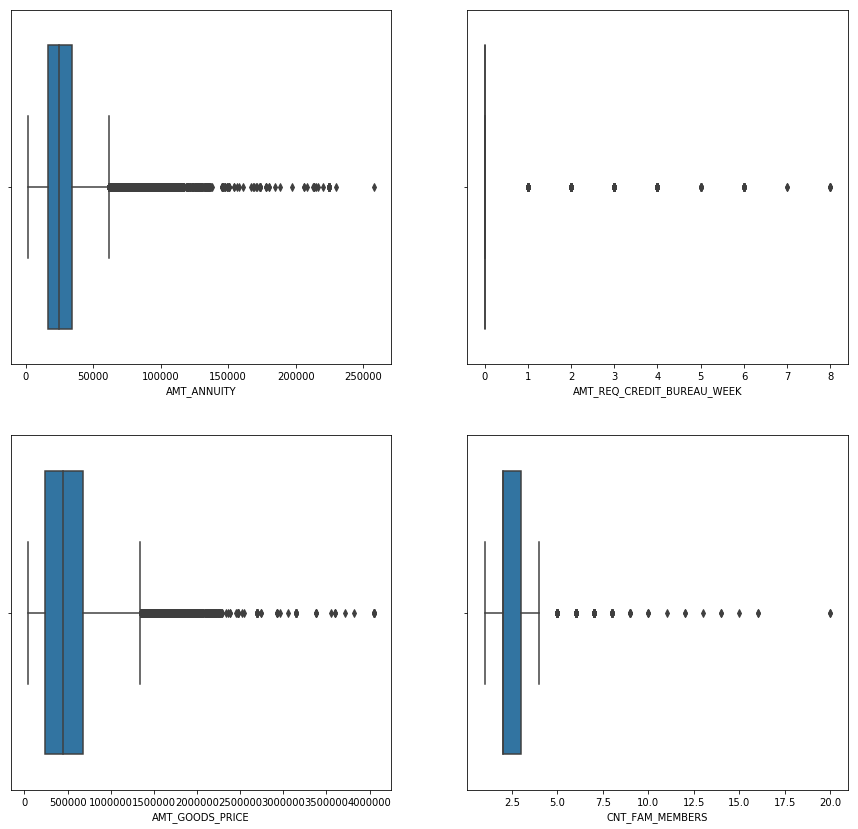

In [17]:
# Graphical way to check if there are any outliers to the mentioned quantitiative column
#Graphical way to check if there are any outliers to the mentioned quantitiative column
plt.figure(figsize=(15,30))
features = ['AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']
for i in enumerate(features):
    ax = plt.subplot(4,2, i[0]+1)
    sns.boxplot(i[1], data = app_data2)

#### Median imputation for the variable whcih has outliers and mean for the variable found without outliers

In [18]:
#Median imputation for the quantitative feilds with outliers
#app_data2['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
app_data2.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data2.AMT_REQ_CREDIT_BUREAU_WEEK.median(), inplace=True)

In [19]:
# Filling the Nan values in the columns obtained above with their statistical mean/median values depending on the variable distribution
app_data2['AMT_ANNUITY'] = app_data2['AMT_ANNUITY'].fillna(app_data2['AMT_ANNUITY'].median())
app_data2['AMT_GOODS_PRICE'] = app_data2['AMT_GOODS_PRICE'].fillna(app_data2['AMT_GOODS_PRICE'].median())
app_data2['CNT_FAM_MEMBERS'] = app_data2['CNT_FAM_MEMBERS'].fillna(app_data2['CNT_FAM_MEMBERS'].mean())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

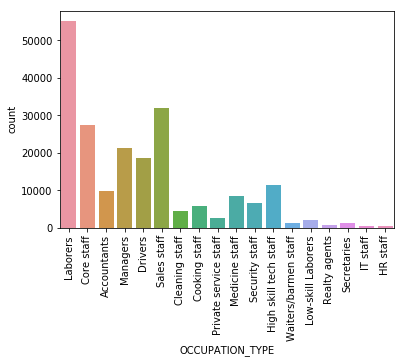

In [20]:
#Graphical way to find the most occuring type of the occupation in the data set. This can also be considered as mode which
#is also verified in the next cell
sns.countplot(x = 'OCCUPATION_TYPE',data = app_data2)
plt.xticks(rotation = 90)

In [21]:
#caluculating the mode of the categorical variable
app_data2['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [22]:
# Replace the Occupation type Nan or null values with 'Labourers' in column OCCUPATION_TYPE as they are the majority occupation type(or mode) in the column
app_data2.loc[pd.isnull(app_data2['OCCUPATION_TYPE']), ['OCCUPATION_TYPE']] = 'Laborers'

In [23]:
# No null values in the datframe as they are replaced accordingly with mean values for numerical data columns 
app_data2.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
AMT_REQ_CREDIT_BUREAU_WEEK     0
dtype: int64

In [24]:
(round(app_data2.isnull().sum()/len(app_data2.index), 2)*100).sort_values(ascending=True)

SK_ID_CURR                     0.0
REGION_RATING_CLIENT_W_CITY    0.0
CNT_FAM_MEMBERS                0.0
OCCUPATION_TYPE                0.0
FLAG_EMAIL                     0.0
FLAG_PHONE                     0.0
FLAG_CONT_MOBILE               0.0
FLAG_EMP_PHONE                 0.0
FLAG_MOBIL                     0.0
DAYS_ID_PUBLISH                0.0
DAYS_REGISTRATION              0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
ORGANIZATION_TYPE              0.0
NAME_HOUSING_TYPE              0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
AMT_GOODS_PRICE                0.0
AMT_ANNUITY                    0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_CONTRACT_TYPE             0.0
TARGET                         0.0
NAME_FAMILY_STATUS             0.0
AMT_REQ_CREDIT_BUREA

In [25]:
#Checking the data type 
app_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED            

In [26]:
#changing of the data type for the columns which can be just integers but they are having float.
app_data2.DAYS_REGISTRATION = app_data2.DAYS_REGISTRATION.astype(np.int64)
app_data2.CNT_FAM_MEMBERS = app_data2.CNT_FAM_MEMBERS.astype(np.int64)

In [27]:
#Binning continuous data variable column 'BIN_AMT_GOODS_PRICE' by counting the number of the records which are lying between the bin ranges

bins = [0, 20000, 50000, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 5000000,10000000]

Amt_Goods_Range = ['0 -20000', '20000-50000','50000-100000', '100000-250000', '250000-500000', '500000-750000','750000-1000000','1000000-1250000',
'1250000-1500000','1500000-1750000','1750000-2000000','2000000-2500000','2500000-5000000','5000000 - Above']

app_data2['BIN_AMT_GOODS_PRICE'] = pd.cut(app_data2['AMT_GOODS_PRICE'], bins,labels=Amt_Goods_Range)

AMT_GOODS_PRICE_Group = app_data2.groupby(pd.cut(app_data2.AMT_GOODS_PRICE, bins))
display(AMT_GOODS_PRICE_Group.AMT_GOODS_PRICE.count())

AMT_GOODS_PRICE
(0, 20000]                 0
(20000, 50000]          1327
(50000, 100000]         7382
(100000, 250000]       76182
(250000, 500000]       98005
(500000, 750000]       57883
(750000, 1000000]      32613
(1000000, 1250000]     17549
(1250000, 1500000]      9656
(1500000, 1750000]      3066
(1750000, 2000000]      2755
(2000000, 2500000]      1038
(2500000, 5000000]        55
(5000000, 10000000]        0
Name: AMT_GOODS_PRICE, dtype: int64

In [28]:
#Binning continuous data variable column 'AMT_CREDIT'

bins = [0, 10000, 50000, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 5000000, 10000000]

AMT_CREDIT_Range = ['0 -10000', '10000-50000', '50000-100000', '100000-250000', '250000-500000', '500000-750000','750000-1000000','1000000-1250000',
'1250000-1500000','1500000-1750000','1750000-2000000','2000000-2500000','2500000-5000000','5000000 - Above']

app_data2['BIN_AMT_CREDIT'] = pd.cut(app_data2['AMT_CREDIT'], bins,labels=AMT_CREDIT_Range)

AMT_CREDIT_Group = app_data2.groupby(pd.cut(app_data2.AMT_CREDIT, bins))
display(AMT_CREDIT_Group.AMT_CREDIT.count())

AMT_CREDIT
(0, 10000]                 0
(10000, 50000]           561
(50000, 100000]         5443
(100000, 250000]       53194
(250000, 500000]       90135
(500000, 750000]       65094
(750000, 1000000]      43099
(1000000, 1250000]     25075
(1250000, 1500000]     14154
(1500000, 1750000]      5642
(1750000, 2000000]      3085
(2000000, 2500000]      1668
(2500000, 5000000]       361
(5000000, 10000000]        0
Name: AMT_CREDIT, dtype: int64

In [29]:
#Binning continuous data variable column 'AMT_ANNUITY'

bins = [0, 10000, 50000, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 5000000, 10000000]

AMT_ANNUITY_Range = ['0 -10000', '10000-50000', '50000-100000', '100000-250000', '250000-500000', '500000-750000','750000-1000000','1000000-1250000',
'1250000-1500000','1500000-1750000','1750000-2000000','2000000-2500000','2500000-5000000','5000000 - Above']

app_data2['BIN_AMT_ANNUITY'] = pd.cut(app_data2['AMT_ANNUITY'], bins,labels=AMT_ANNUITY_Range)

AMT_ANNUITY_Group = app_data2.groupby(pd.cut(app_data2.AMT_ANNUITY, bins))
display(AMT_CREDIT_Group.AMT_CREDIT.count())

AMT_CREDIT
(0, 10000]                 0
(10000, 50000]           561
(50000, 100000]         5443
(100000, 250000]       53194
(250000, 500000]       90135
(500000, 750000]       65094
(750000, 1000000]      43099
(1000000, 1250000]     25075
(1250000, 1500000]     14154
(1500000, 1750000]      5642
(1750000, 2000000]      3085
(2000000, 2500000]      1668
(2500000, 5000000]       361
(5000000, 10000000]        0
Name: AMT_CREDIT, dtype: int64

In [30]:
#Binning continuous data variable column 'AMT_INCOME_TOTAL'

bins = [0, 20000, 50000, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 5000000, 10000000]

AMT_INCOME_TOTAL_Range = ['0 -20000', '20000-50000','50000-100000','100000-250000', '250000-500000', '500000-750000','750000-1000000','1000000-1250000',
'1250000-1500000','1500000-1750000','1750000-2000000','2000000-2500000','2500000-5000000','5000000 - Above']

app_data2['BIN_AMOUNT_INCOME_TOTAL'] = pd.cut(app_data2['AMT_INCOME_TOTAL'], bins,labels=AMT_INCOME_TOTAL_Range)
incomeGroup = app_data2.groupby(pd.cut(app_data2.AMT_INCOME_TOTAL, bins))
display(incomeGroup.AMT_INCOME_TOTAL.count())

AMT_INCOME_TOTAL
(0, 20000]                  0
(20000, 50000]           4517
(50000, 100000]         59181
(100000, 250000]       204035
(250000, 500000]        37076
(500000, 750000]         2058
(750000, 1000000]         394
(1000000, 1250000]         99
(1250000, 1500000]         67
(1500000, 1750000]         20
(1750000, 2000000]         20
(2000000, 2500000]         25
(2500000, 5000000]         14
(5000000, 10000000]         2
Name: AMT_INCOME_TOTAL, dtype: int64

In [31]:
# Age calculation from the column "DAYS_BIRTH" in the dataframe

app_data2['AGE_IN_YEARS'] = (app_data2['DAYS_BIRTH'].abs() / 365).astype(int)
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
AGE_IN_YEARS_Range = ['0-20','20-30','30-40','40-50','50-60','60-70', '70-80', '80-90','90-100']
app_data2['BIN_AGE_IN_YEARS'] = pd.cut(app_data2['AGE_IN_YEARS'], bins,labels=AGE_IN_YEARS_Range)
AgeGroup = app_data2.groupby(pd.cut(app_data2.AGE_IN_YEARS, bins))
display(AgeGroup.AGE_IN_YEARS.count())

AGE_IN_YEARS
(10, 20]         1
(20, 30]     52805
(30, 40]     83117
(40, 50]     74401
(50, 60]     67819
(60, 70]     29368
(70, 80]         0
(80, 90]         0
(90, 100]        0
Name: AGE_IN_YEARS, dtype: int64

In [32]:
app_data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,BIN_AMT_GOODS_PRICE,BIN_AMT_CREDIT,BIN_AMT_ANNUITY,BIN_AMOUNT_INCOME_TOTAL,AGE_IN_YEARS,BIN_AGE_IN_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,-2120,1,1,1,1,0,Laborers,1,2,Business Entity Type 3,0.0,250000-500000,250000-500000,10000-50000,100000-250000,25,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,1,1,1,1,0,Core staff,2,1,School,0.0,1000000-1250000,1250000-1500000,10000-50000,250000-500000,45,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,-2531,1,1,1,1,0,Laborers,1,2,Government,0.0,100000-250000,100000-250000,0 -10000,50000-100000,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,-2437,1,1,1,0,0,Laborers,2,2,Business Entity Type 3,0.0,250000-500000,250000-500000,10000-50000,100000-250000,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,-3458,1,1,1,0,0,Core staff,1,2,Religion,0.0,500000-750000,500000-750000,10000-50000,100000-250000,54,50-60


### Data Imbalance

In [33]:
#To find the data imbalance in terms of percentage in Target Variable

Clients_with_diff = len(app_data2[app_data2["TARGET"]==1])
print("Clients with difficulty:", Clients_with_diff)
Clients_No_Diff = len(app_data2[app_data2["TARGET"]==0])
print("Clients with No difficulty:", Clients_No_Diff)
Total = (Clients_with_diff + Clients_No_Diff)
Data_imbalance_with_diff = 100*((Clients_with_diff)/Total)
Data_imbalance_with_no_diff = 100*((Clients_No_Diff)/Total)
#Data_imbalance_Absl = abs(Data_imbalance)# Absolute value of data imbalance
#print("Absolute_data_imbalance:", round(Data_imbalance_Absl,4))
print("Percentage_data_imbalance with difficulty(%) :", round(Data_imbalance_with_diff,2))
print("Percentage_data_imbalance with no difficulty(%):", round(Data_imbalance_with_no_diff,2))
print("Ratio of imbalance:", round(Clients_No_Diff/Clients_with_diff,3),': 1')

Clients with difficulty: 24825
Clients with No difficulty: 282686
Percentage_data_imbalance with difficulty(%) : 8.07
Percentage_data_imbalance with no difficulty(%): 91.93
Ratio of imbalance: 11.387 : 1


Text(0.5,1,'TARGET - Data_Imbalance')


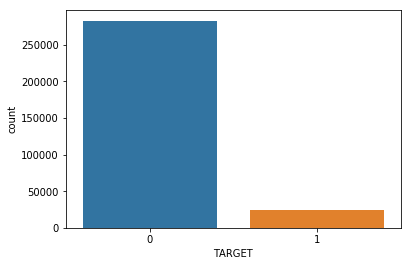

In [34]:
sns.countplot(x = 'TARGET', data  =app_data2)
print(ax.set_title ("TARGET - Data_Imbalance"))

#### Data Imbalance in the application_data is found and its hugely leaned towards the customers with out having any difficulty to repay the loan i.e., 91.93% of the applicants doesnt find any difficulty in the repayment of the loan and if we use this data as is for the training the model we would not be able to predict the defaulting the behaviour more accurately

[Text(0.5,0,'AMT_REQ_CREDIT_BUREAU_WEEK')]

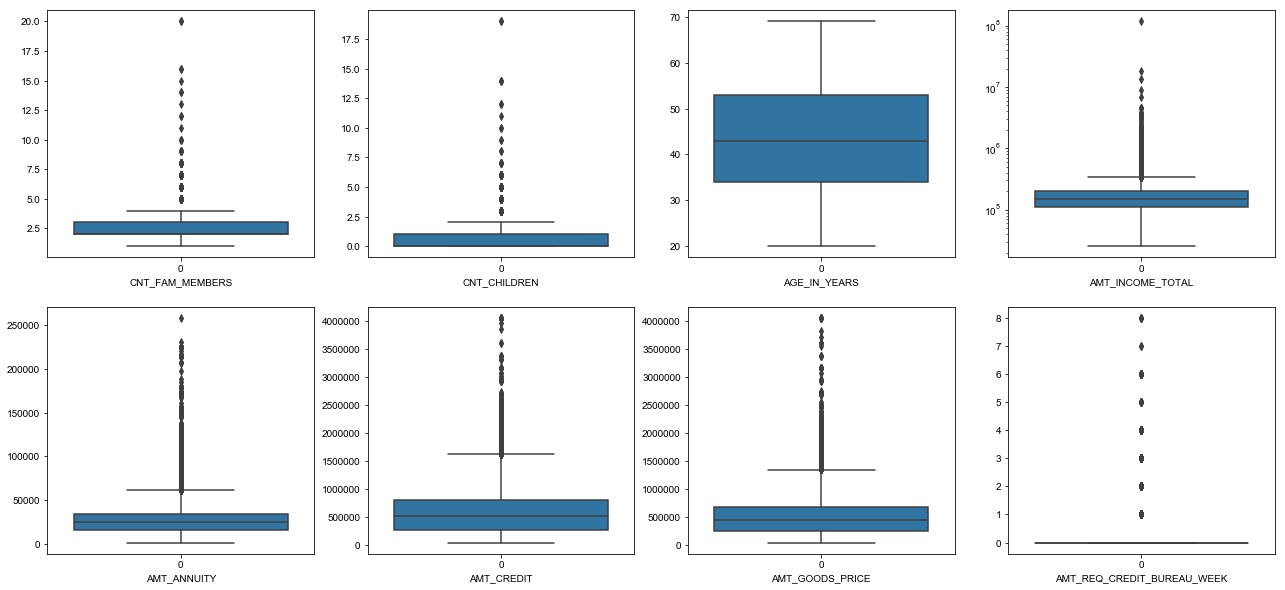

In [35]:
# To check if there are outliers in the columns in the dataframe

fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(22,10))
sns.set_style("whitegrid")

a = sns.boxplot(data=[app_data2['CNT_FAM_MEMBERS']], ax=axes[0][0])
a.set(xlabel = "CNT_FAM_MEMBERS")

b = sns.boxplot(data=[app_data2['CNT_CHILDREN']], ax=axes[0][1])
b.set(xlabel = "CNT_CHILDREN")

#app_data2['AGE_IN_YEARS'] = (app_data2['DAYS_BIRTH'].abs() / 365).astype(int) #Converted DAYS_BIRTH to AGE_IN_YEARS
c = sns.boxplot(data=[app_data2['AGE_IN_YEARS']], ax=axes[0][2])
c.set(xlabel = "AGE_IN_YEARS")

p = sns.boxplot(data=[app_data2['AMT_INCOME_TOTAL']], ax=axes[0][3])
p.set(yscale ="log")
p.set(xlabel = "AMT_INCOME_TOTAL")

m= sns.boxplot(data=[app_data2['AMT_ANNUITY']], ax=axes[1][0])
m.set(xlabel = "AMT_ANNUITY")

s= sns.boxplot(data=[app_data2['AMT_CREDIT']], ax=axes[1][1])
s.set(xlabel = "AMT_CREDIT")

gp= sns.boxplot(data=[app_data2['AMT_GOODS_PRICE']], ax=axes[1][2])
gp.set(xlabel = "AMT_GOODS_PRICE")

CBW= sns.boxplot(data=[app_data2['AMT_REQ_CREDIT_BUREAU_WEEK']], ax=axes[1][3])
CBW.set(xlabel = "AMT_REQ_CREDIT_BUREAU_WEEK")

### Observations:
#### There are outliers found in CNT_FAM_MEMBERS i.e there are some applicants who might have more number of dependents on him/her
#### There are outliers found in CNT_CHILDREN i.e there are some applicants who might have more number of dependents on him/her depending on the age of the children
#### There are no outliers in DAYS_BIRTH/ AGE_IN_YEARS

#### There are outliers found in AMT_INCOME_TOTAL i.e. there are applicants who has more income than the 75 percentile of the population for these applicants there should not be any difficulty in the loan clearance.

#### There are outliers found in AMT_Annuity i.e. these applicants needs to keep some amount of money separate for the purpose of annuity and this might be a risk in terms of the loan clearance

#### There are lot of outliers found in AMT_CREDIT i.e., for these customers representing the outliers there is risk that the loan payment can be delayed because of prior credit history

#### There are Outliers in AMT_GOODS_PRICE, this is an interesting variable to look at as this means there are some loans whcih whose worth is higher than normal goods/properties. So care should be taken while lending such high valued loans

#### There are some outliers in the AMT_REQ_CREDIT_BUREAU_WEEK which means bank has sent lot queries than usual it might be because of so many reasons, so for the customers who got bad rating in the enquiry should not be given a loan or should be given less loan

#### Treating Outliers:
Capping the max number of the quantitative values a column could have, like MAX family members, MAX Children is 3. 

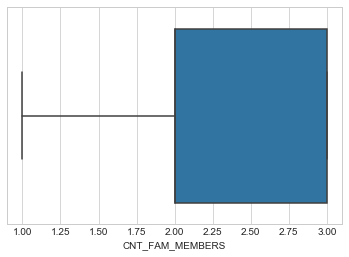

In [36]:
app_data2["CNT_FAM_MEMBERS"] =np.where(app_data2["CNT_FAM_MEMBERS"]>=3,3,app_data2["CNT_FAM_MEMBERS"])
sns.boxplot(x= app_data2["CNT_FAM_MEMBERS"])

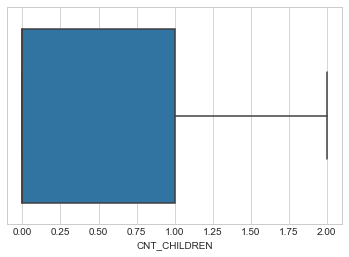

In [37]:
app_data2["CNT_CHILDREN"] =np.where(app_data2["CNT_CHILDREN"]>=3,2,app_data2["CNT_CHILDREN"])
sns.boxplot(x= app_data2["CNT_CHILDREN"])

In [38]:
#Forming a dataframe for "app_data2_Tg_df0" for Univariate, Bivariate analysis for the target value of "0"-clients with no difficulty
app_data2_Tg_df0 = app_data2[app_data2['TARGET'] == 0]
app_data2_Tg_df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,BIN_AMT_GOODS_PRICE,BIN_AMT_CREDIT,BIN_AMT_ANNUITY,BIN_AMOUNT_INCOME_TOTAL,AGE_IN_YEARS,BIN_AGE_IN_YEARS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,1,1,1,1,0,Core staff,2,1,School,0.0,1000000-1250000,1250000-1500000,10000-50000,250000-500000,45,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,-2531,1,1,1,1,0,Laborers,1,2,Government,0.0,100000-250000,100000-250000,0 -10000,50000-100000,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,-2437,1,1,1,0,0,Laborers,2,2,Business Entity Type 3,0.0,250000-500000,250000-500000,10000-50000,100000-250000,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,-3458,1,1,1,0,0,Core staff,1,2,Religion,0.0,500000-750000,500000-750000,10000-50000,100000-250000,54,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,-477,1,1,1,1,0,Laborers,2,2,Other,0.0,250000-500000,250000-500000,10000-50000,50000-100000,46,40-50


In [39]:
#Forming a dataframe for "app_data2_Tg_df1" for Univariate, Bivariate analysis for the target value of "1"-clients with difficulty
app_data2_Tg_df1 = app_data2[app_data2['TARGET'] == 1]
app_data2_Tg_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,BIN_AMT_GOODS_PRICE,BIN_AMT_CREDIT,BIN_AMT_ANNUITY,BIN_AMOUNT_INCOME_TOTAL,AGE_IN_YEARS,BIN_AGE_IN_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,-2120,1,1,1,1,0,Laborers,1,2,Business Entity Type 3,0.0,250000-500000,250000-500000,10000-50000,100000-250000,25,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,-2628,-6573,-1827,1,1,1,0,0,Cooking staff,1,2,Business Entity Type 3,0.0,500000-750000,750000-1000000,10000-50000,100000-250000,51,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,-1262,-1182,-1029,1,1,1,0,0,Laborers,2,2,Business Entity Type 3,0.0,750000-1000000,1000000-1250000,10000-50000,100000-250000,47,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,-3597,-45,-4409,1,1,1,1,0,Sales staff,2,3,Self-employed,0.0,100000-250000,250000-500000,10000-50000,100000-250000,36,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,365243,-5391,-4199,1,0,1,0,0,Laborers,2,2,XNA,0.0,250000-500000,250000-500000,10000-50000,50000-100000,67,60-70


## Univariate Analysis for Categorical data columns for the target variable '0' - clients with no difficulty

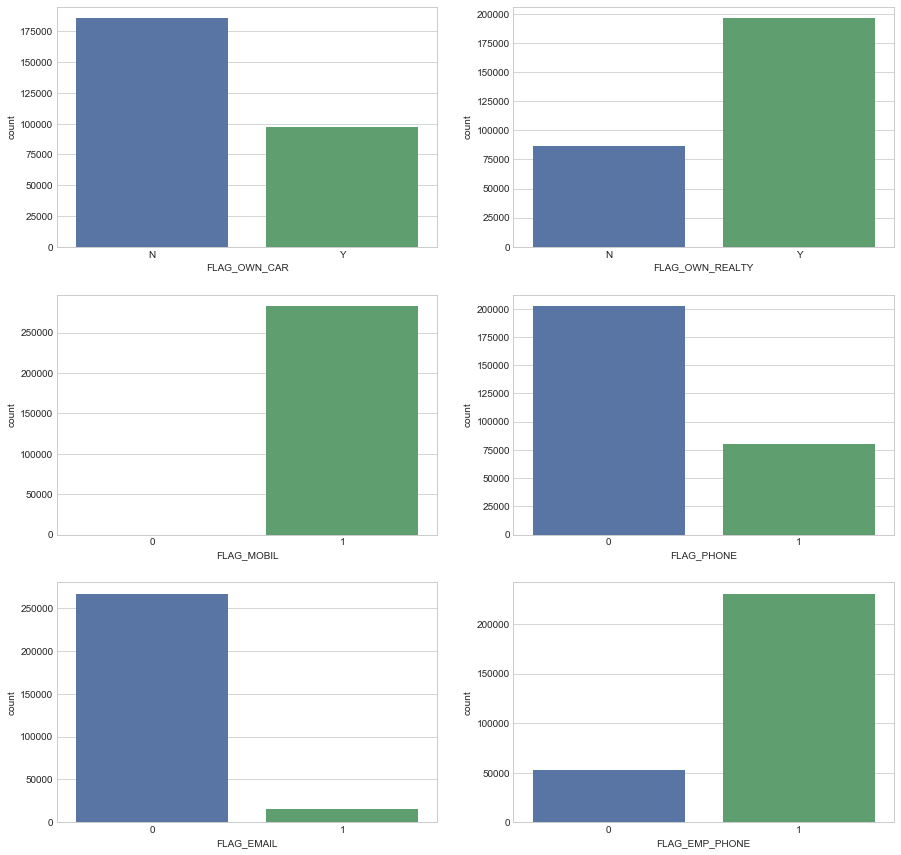

In [40]:
Columns = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE']
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df0[var1], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

### Observations:
1. For the applicants who doesnt own a car there is a chance that they dont find difficulty in repaying the loan (It might be because there wont be expense on car)
2. For the applicants who own a real estate property there is a chance that they dont find difficulty in repaying the loan (It might be because they dont need to pay rent for living or get steady income on realty)
3. For the applicants who own a mobile phone there is a chance that they dont find difficulty in repaying the loan (It might be because , it is common to own a mobile phone now a days and they get reminders about the loan payment timely)
4. For the applicants who doesnt own a phone there is a chance that they dont find difficulty in repaying the loan. we could not get much of an inference from this
5. For the applicants who has a email there is a chance that they dont find difficulty in repaying the loan (It might be because , it is common to have a email now a days and they get reminders about the loan payment timely)
6. For the applicants who has a employee phone number there is a chance that they dont find difficulty in repaying the loan (It might be because ,they get reminders about the loan payment timely)


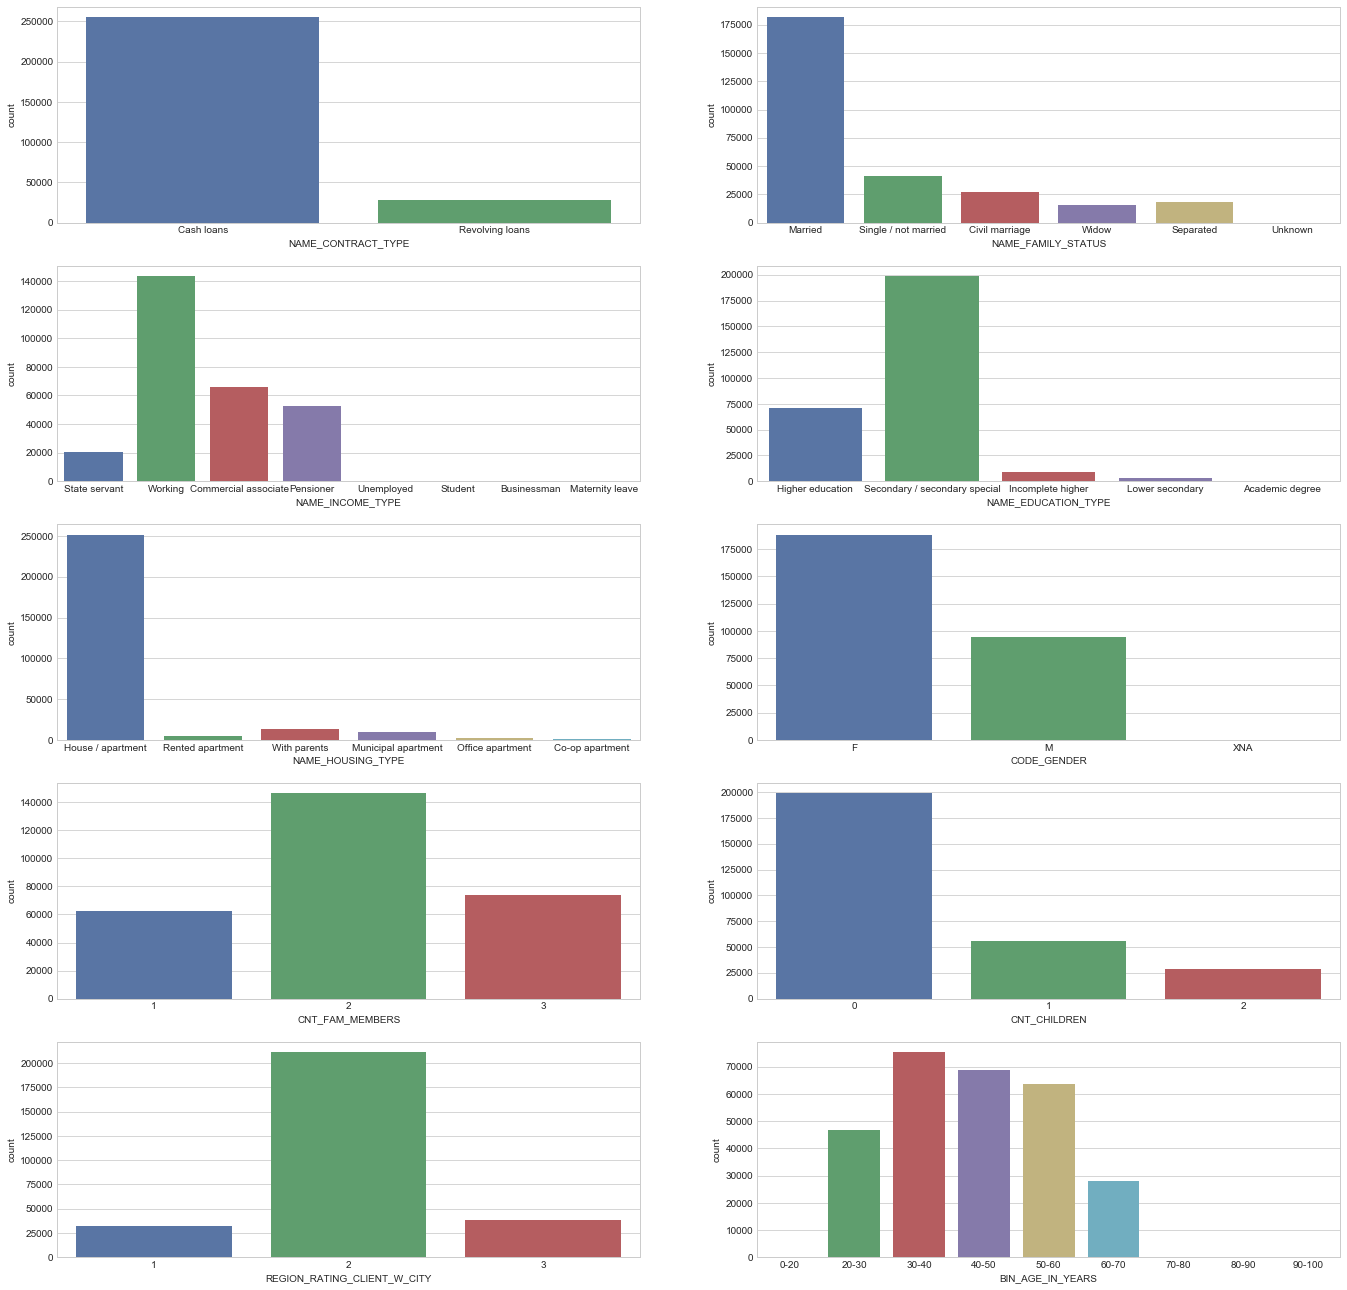

In [41]:
Columns = ['NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
           'CODE_GENDER', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','REGION_RATING_CLIENT_W_CITY', 'BIN_AGE_IN_YEARS']
fig, ax = plt.subplots(5, 2, figsize=(23,23))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df0[var1], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

#### Observations for the applicants who doesnt find difficulty in repaying the loans:
1. We can understand for this category of applicants they are taking more cash loans, most of them are married and single, they are working professionals or commercial associates
2. Most of the applicants who are in this category are lower secondary and above educated and mostly living in a house / appartment
3. Most of the applicants who belong to this catgory are females and typically with a family size of two, and most of them dont have a child
4. Most of the applicants in this category reside in the type 2 and 3 regions
5. Most of the applicants in this category belong to the 30 to 60 years age group

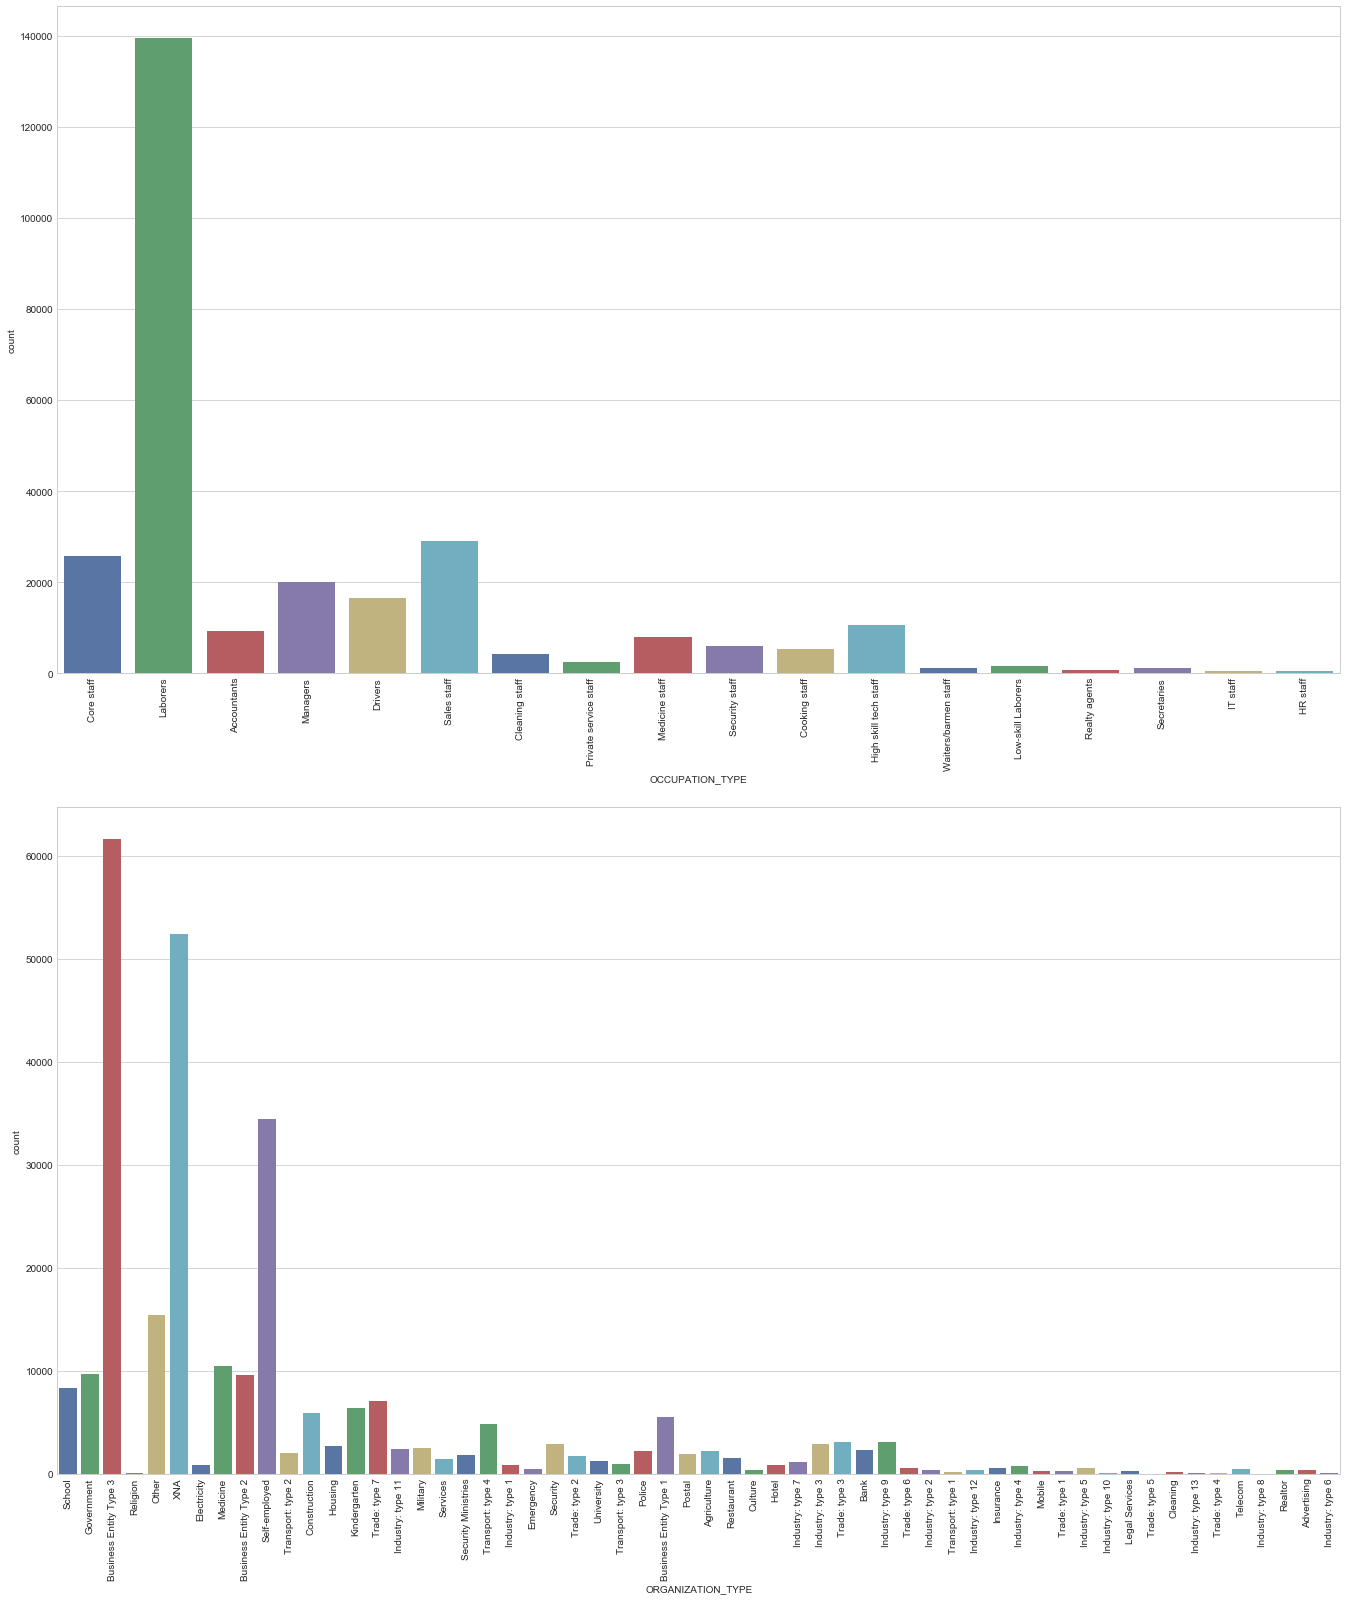

In [42]:
Columns = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
fig, ax = plt.subplots(2, 1, figsize=(23,27))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df0[var1], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


#### Observations for applicants who dont find difficulty in repaying the loan :
1. Applicants in this category mostly fall under the occupation of laboourers who work in Business Entity type 3 organizations/ self employed/ they didnt mention


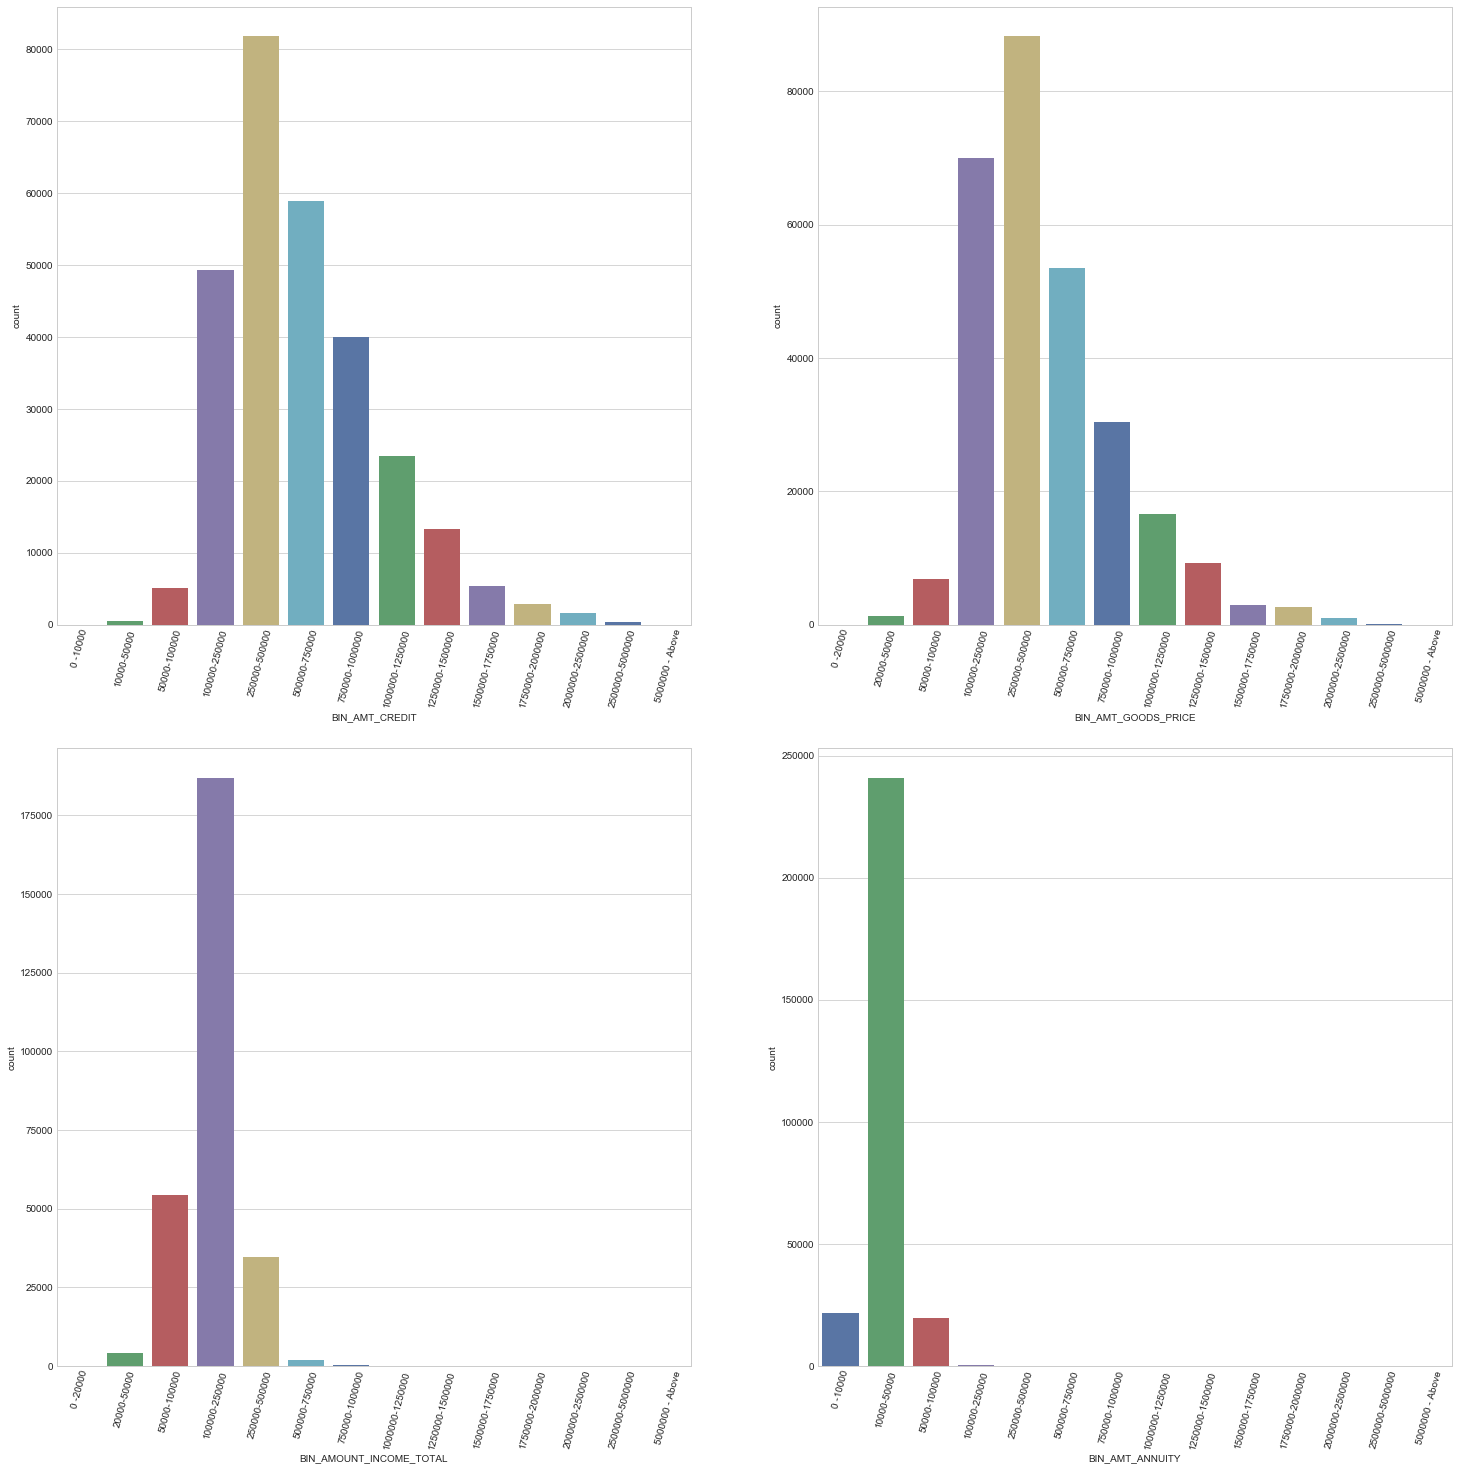

In [43]:
#Univariate Analysis for Continous variable (binned)
Columns = ['BIN_AMT_CREDIT', 'BIN_AMT_GOODS_PRICE', 'BIN_AMOUNT_INCOME_TOTAL','BIN_AMT_ANNUITY']
fig, ax = plt.subplots(2, 2, figsize=(25,25))
for var2, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df0[var2], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(75)

#### Observations: 
1. We can see that the most the peple who are able to repay the loans are havign the credit somewhere between (100k to 750k) and annuity between 10k to 50k
2. Miost of the are in the income range between 20K to 500K
3. The Goods price for which they are taking the loan are in the range of 50K, 1000K


## Univariate Analysis for Categorical data columns for the target variable '1' - clients with difficulty

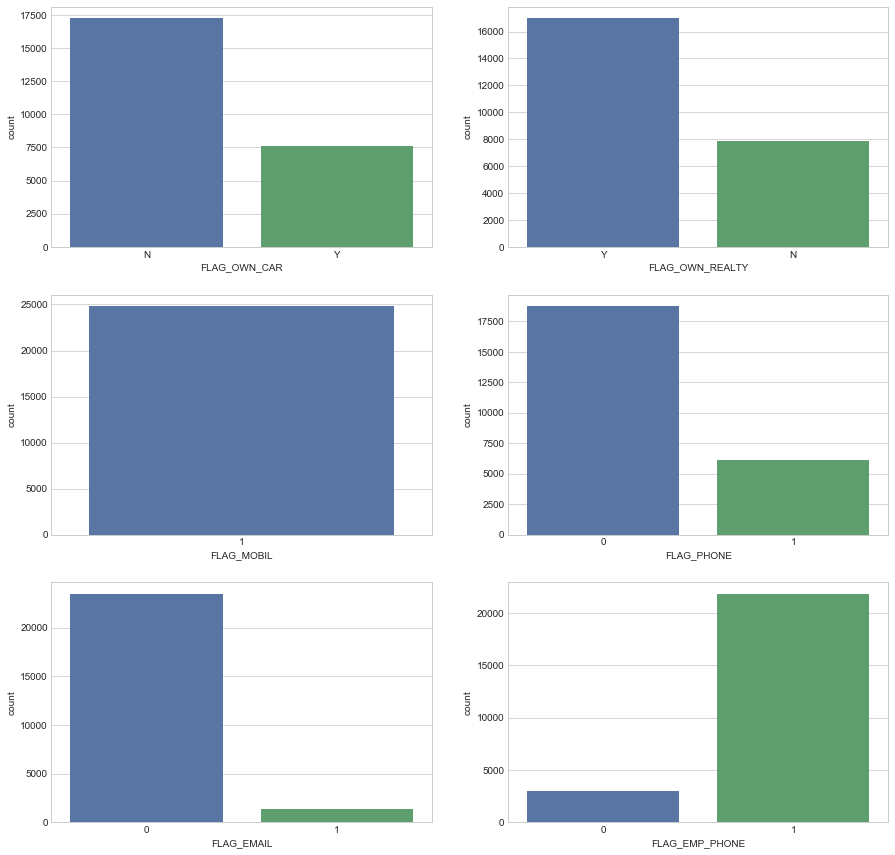

In [44]:
Columns = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE','']
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for var2, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df1[var2], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)


### Observations:
1. For the applicants who doesnt own a car there is a chance that they find difficulty in repaying the loan, this might be because they are not in a condition of affording the car also
2. For the applicants who own a real estate property there is a chance that they find difficulty in repaying the loan.It might be deprecating assest class which needs more investment
3. we could get an inference with owning a mobile or phone or email or employee phone, which states that even they are informed about the remainder they find difficulty in repaying the loan in proper time

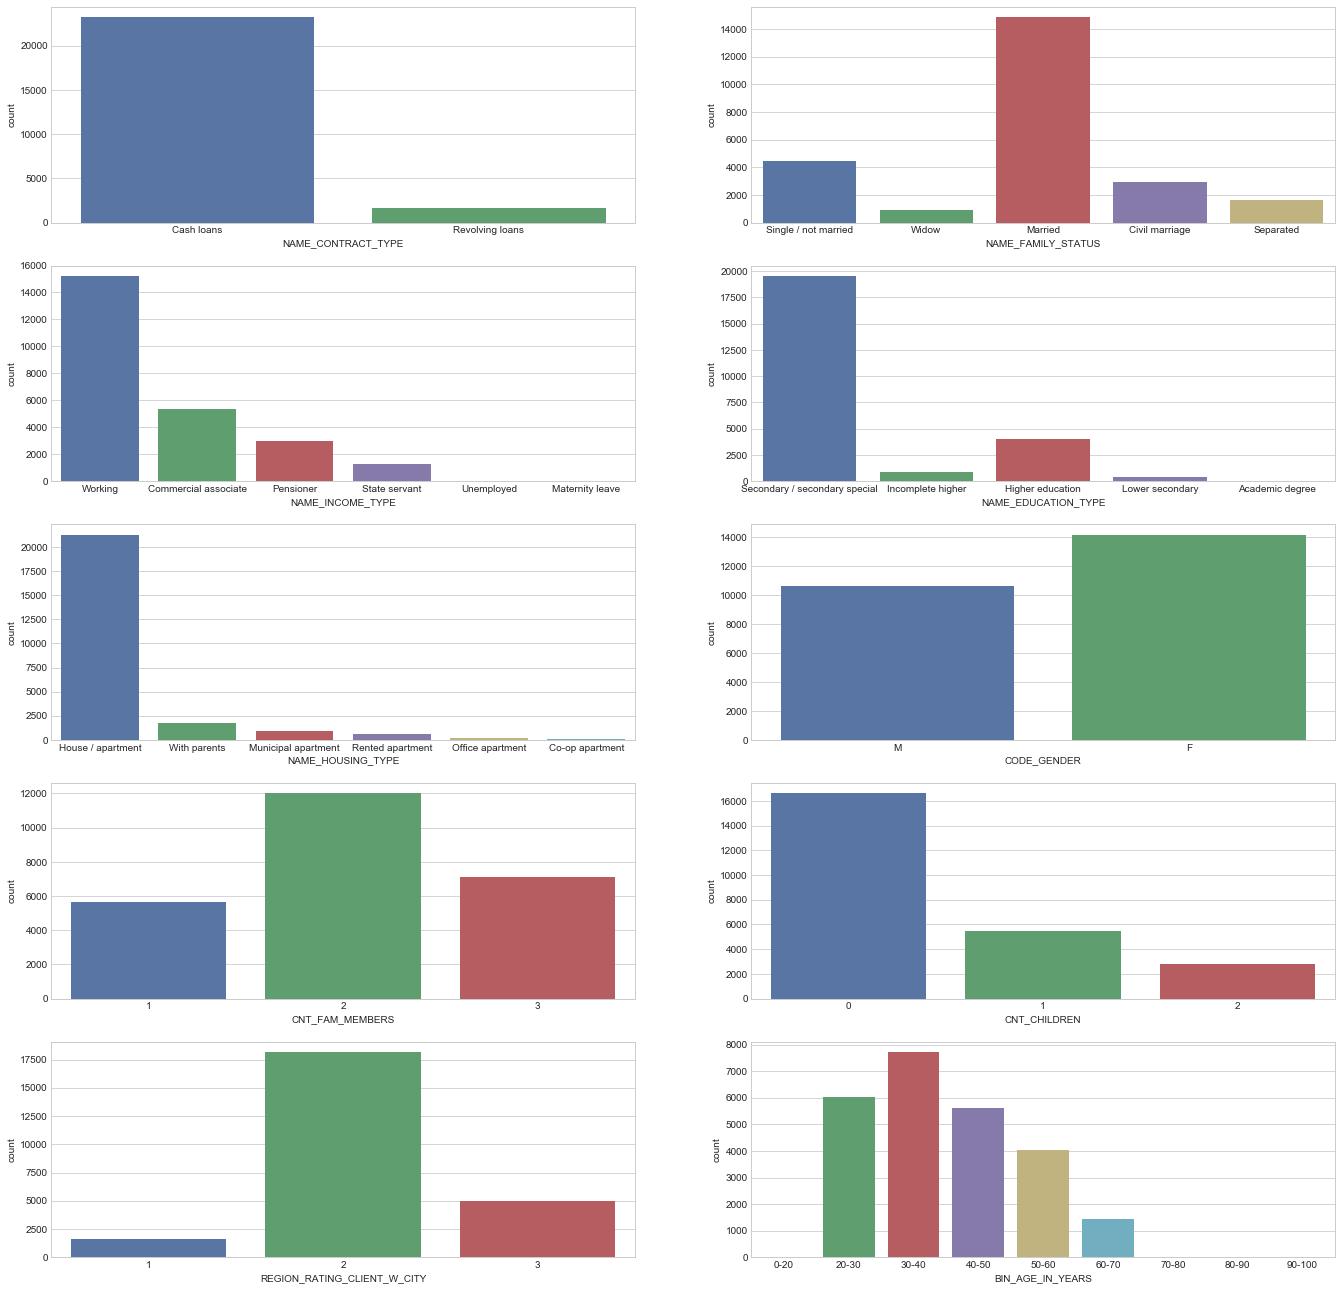

In [45]:
Columns = ['NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
           'CODE_GENDER', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','REGION_RATING_CLIENT_W_CITY', 'BIN_AGE_IN_YEARS']
fig, ax = plt.subplots(5, 2, figsize=(23,23))
for var2, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df1[var2], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

#### Observations for the applicants who doesnt find difficulty in repaying the loans:
1. We can understand for this category of applicants they are taking more cash loans, most of them are married and single, they are working professionals or commercial associates
2. Most of the applicants who are in this category are lower secondary and above educated and mostly living in a house / appartment
3. Most of the applicants who belong to this catgory are females and typically with a family size of two, and most of them dont have a child
4. Most of the applicants in this category reside in the type 2 and 3 regions
5. Most of the applicants in this category belong to the 20 to 50 years age group

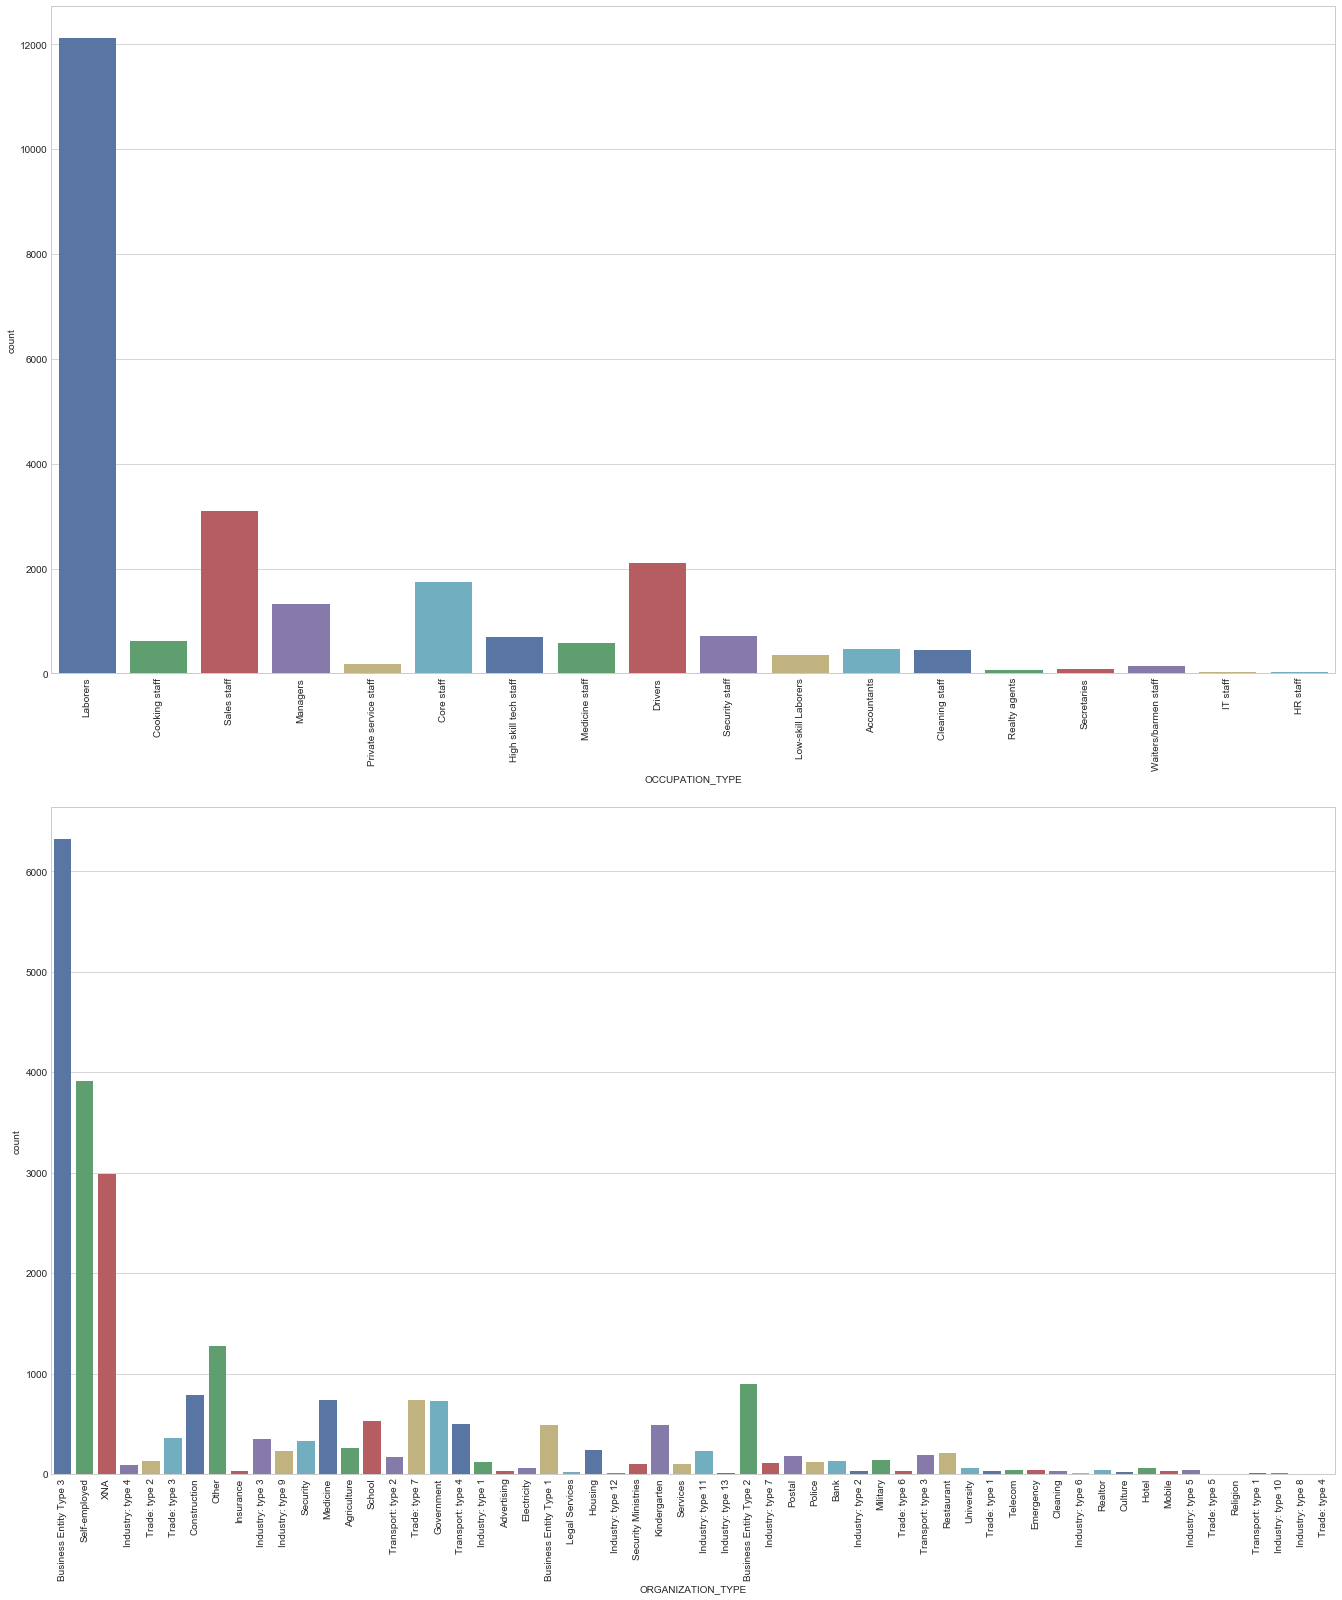

In [46]:
Columns = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
fig, ax = plt.subplots(2, 1, figsize=(23,27))
for var2, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df1[var2], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Observations for applicants who dont find difficulty in repaying the loan :
1. Applicants in this category mostly fall under the occupation of laboourers who work in Business Entity type 3 organizations/ self employed/ they didnt mention

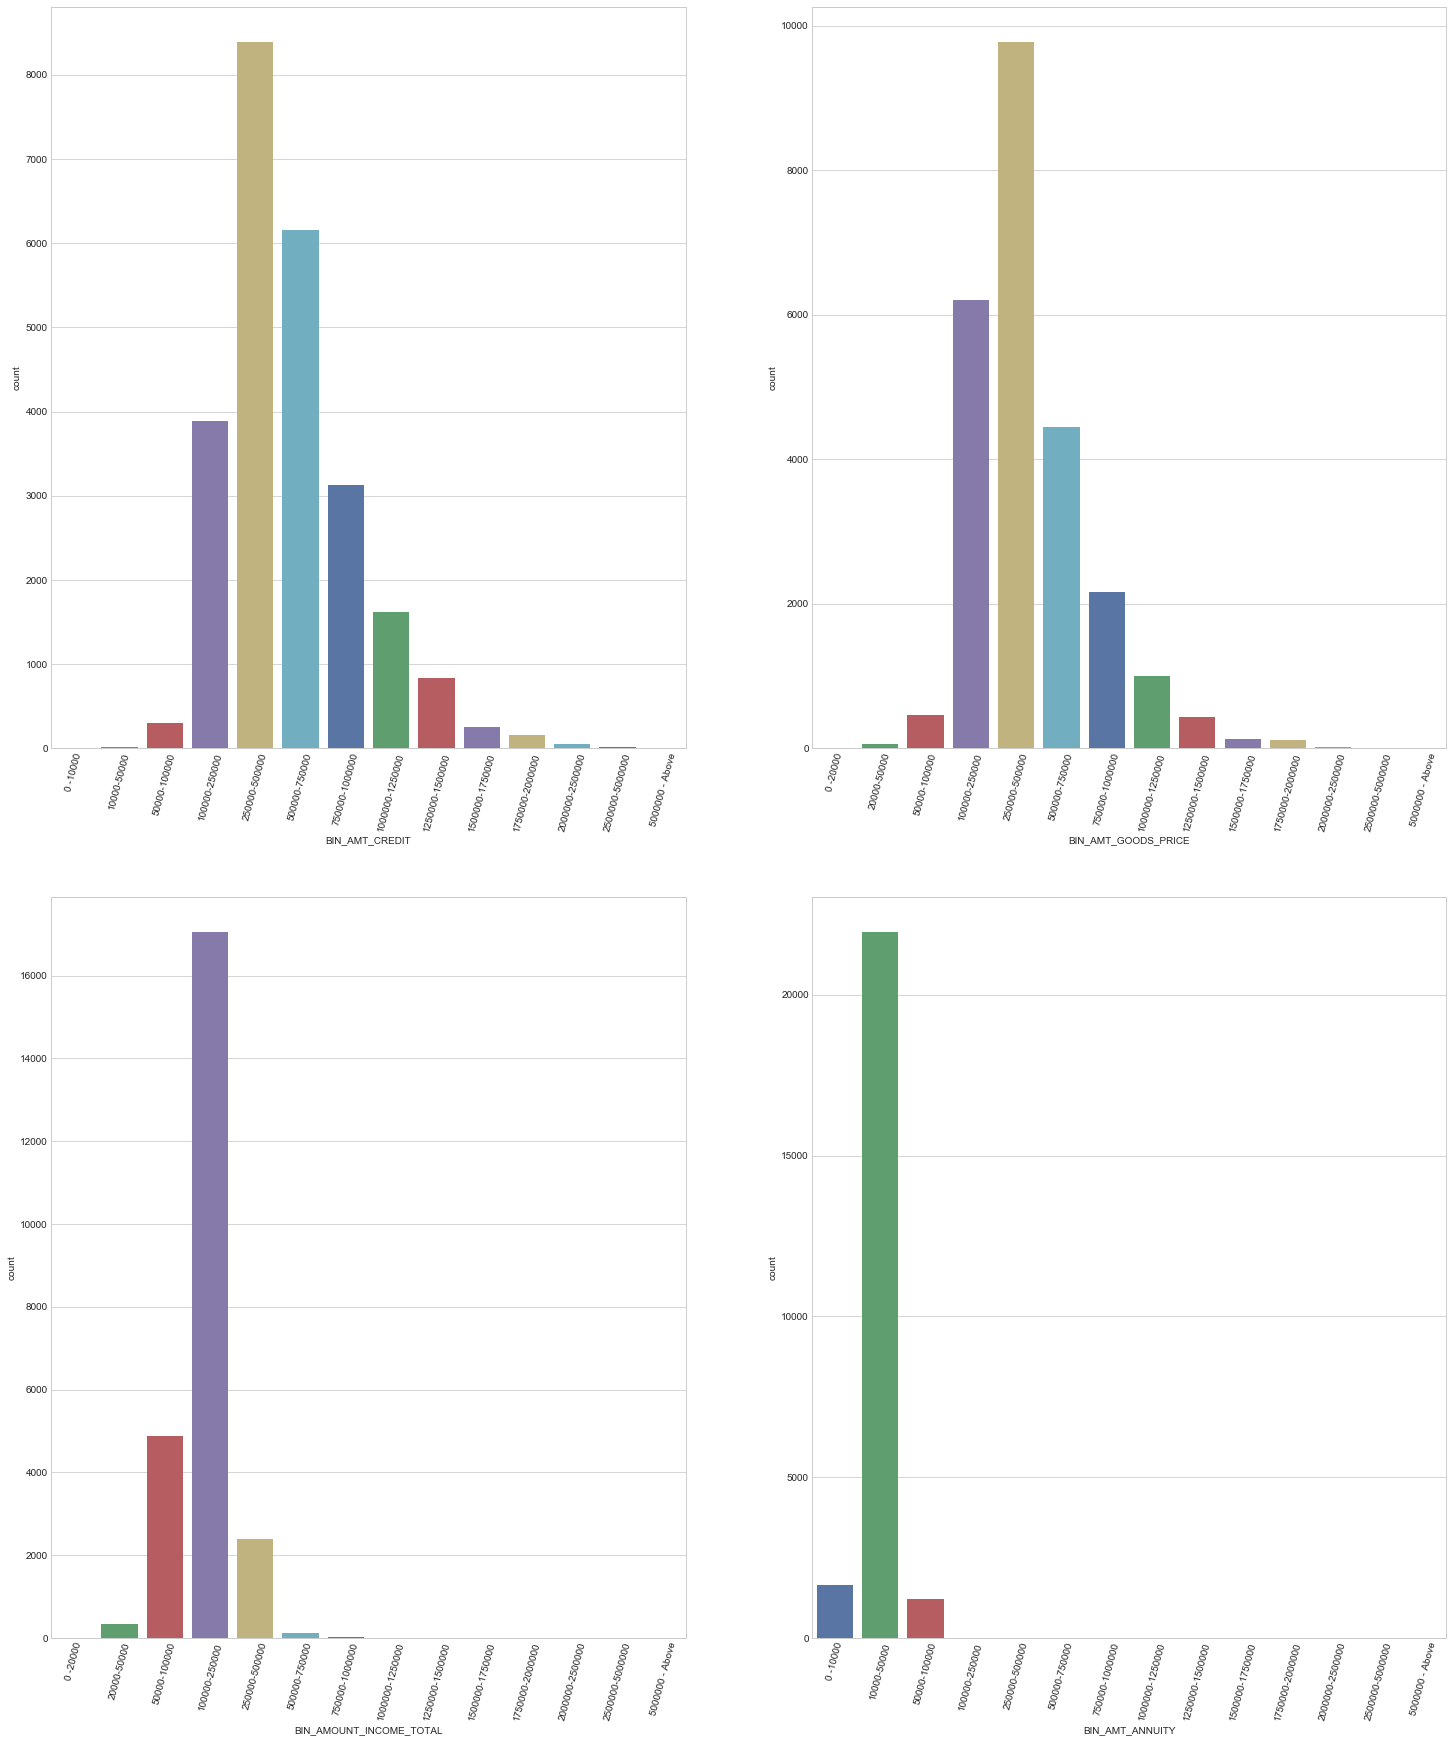

In [47]:
Columns = ['BIN_AMT_CREDIT', 'BIN_AMT_GOODS_PRICE', 'BIN_AMOUNT_INCOME_TOTAL','BIN_AMT_ANNUITY']
fig, ax = plt.subplots(2, 2, figsize=(25, 30))
for var2, subplot in zip(Columns, ax.flatten()):
    sns.countplot(app_data2_Tg_df1[var2], ax=subplot,palette='deep')
    for label in subplot.get_xticklabels():
        label.set_rotation(75)

#### Observations for Univariate Analysis for Continuous data columns for the Target Variable "1" - clients with difficulty
1. We can see that the most the peple who are not able to repay the loans on time are havign the credit somewhere between (100k to 750k) and annuity between 10k to 50k
2. Most of the are in the income range between 100K to 250K
3. The Goods price for which they are taking the loan are in the range of 100K, 750K



#### Since the pattern of the univariate and bi variate analysis of the two different categories of the data sets are similar, we have taken the bivariate analysis of the whole dataset so that we can compare both of them in the same graph and pull out few insights

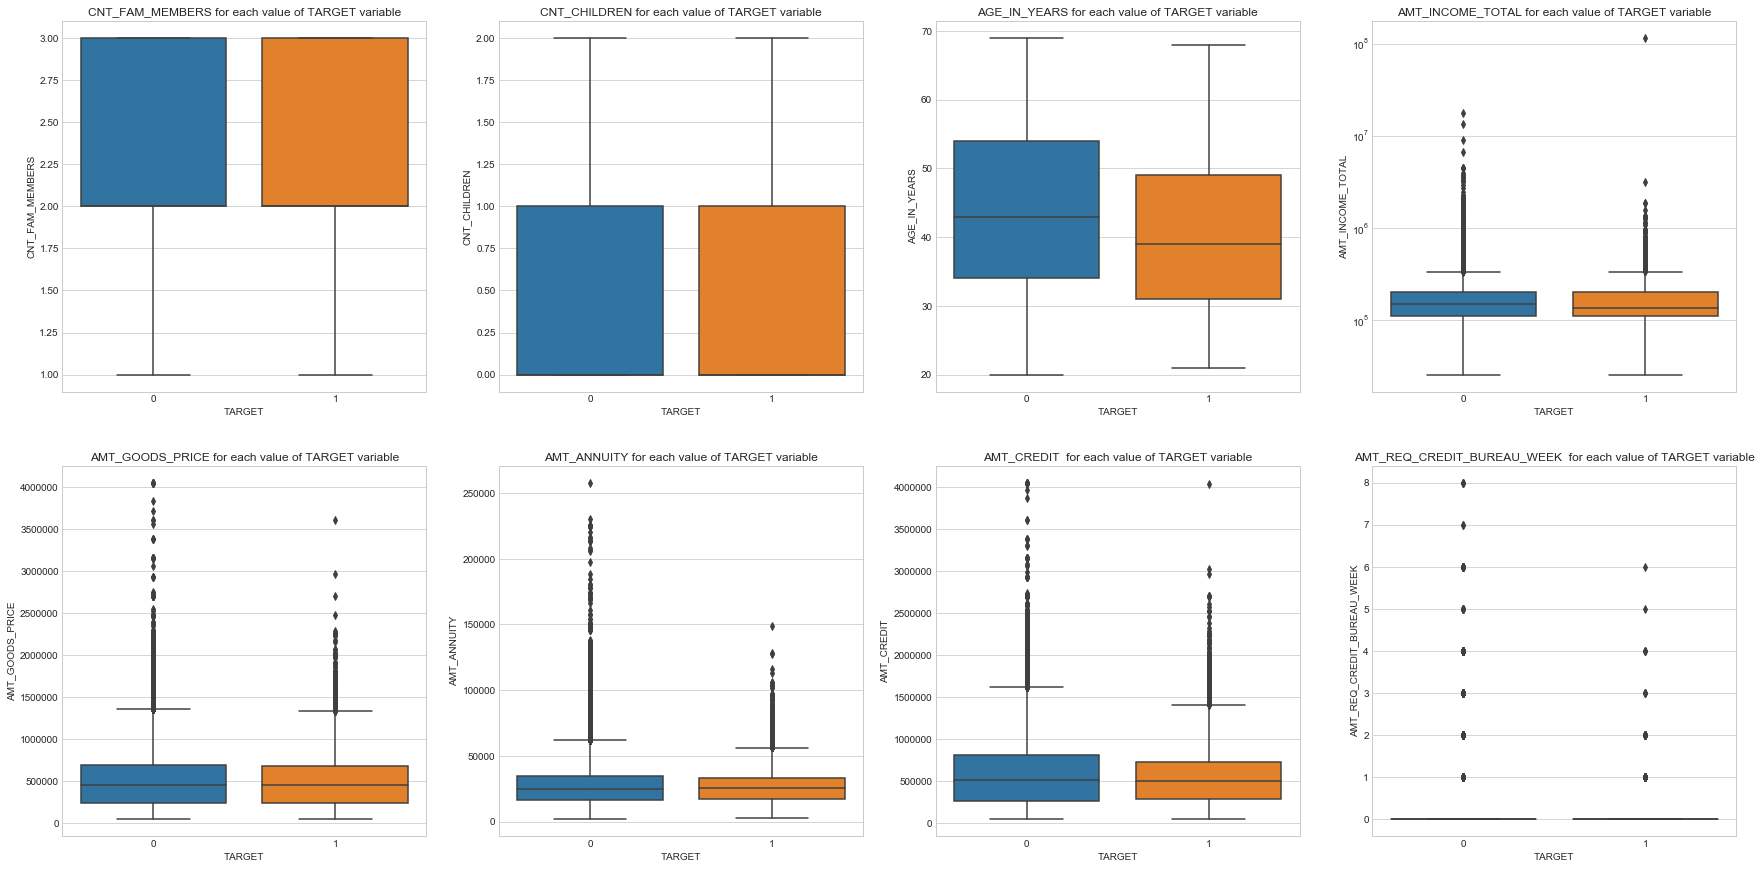

In [48]:
# To identify the outliers based on each categorical value of Target Variable

fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(30,15))

sns.boxplot(x="TARGET", y="CNT_FAM_MEMBERS", data= app_data2, ax=axes[0][0])
axes[0][0].set_title('CNT_FAM_MEMBERS for each value of TARGET variable')

sns.boxplot(x="TARGET", y="CNT_CHILDREN", data= app_data2, ax=axes[0][1])
axes[0][1].set_title('CNT_CHILDREN for each value of TARGET variable')

#app_data2['AGE_IN_YEARS'] = (app_data2['DAYS_BIRTH'].abs() / 365).astype(int) #Converted DAYS_BIRTH to AGE_IN_YEARS
c = sns.boxplot(x="TARGET", y="AGE_IN_YEARS", data= app_data2, ax=axes[0][2])
axes[0][2].set_title('AGE_IN_YEARS for each value of TARGET variable')

Ti = sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= app_data2, ax=axes[0][3])
Ti.set(yscale ="log")
axes[0][3].set_title('AMT_INCOME_TOTAL for each value of TARGET variable')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= app_data2, ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE for each value of TARGET variable')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= app_data2, ax=axes[1][1])
axes[1][1].set_title('AMT_ANNUITY for each value of TARGET variable')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= app_data2, ax=axes[1][2])
axes[1][2].set_title('AMT_CREDIT  for each value of TARGET variable')

CBW= sns.boxplot(x="TARGET", y="AMT_REQ_CREDIT_BUREAU_WEEK", data= app_data2, ax=axes[1][3])
axes[1][3].set_title('AMT_REQ_CREDIT_BUREAU_WEEK  for each value of TARGET variable')

plt.show()

#### Observations:

1. There is no major difference between the behaviour of Target 1 and 0 for the Count of family members affecting the loan reapayment
2. There is no major difference between the behaviour of Target 1 and 0 for the Count of Children affecting the loan reapayment,  but we can see that in the case of the laon defaulters we can see that most of them are without children
3. If we see the hist plot(below) between the target and the age in years we can infer that the applicants around age of 30 are more prone to default lone.
4. As per the AMT_Income_Total for each value of Target variable (1st row,4th) graph we can see that the median income of the applicant is less for the applicants who are prone to default the loan.
5. If we see the above graph (2nd row, 1st graph) and below dist plot(2nd row, 1st) we can see that in every segment of the goods prioce we have people repaying the loan is more than the people finding difficulty in repaying the loan.
6. With respect to the annuity we can observe that from the below distribution plot (2nd row, 2nd) most of the applicants are having some annuity between 0-50000. and in that bracket we can see that there is more possiblity for the people finding difficulty in repaying the loan.
7. For the Amount credit, we can understand that majority of the applicants fall under the 100000 below and in this its observed that the applicants face difficulty in repaying the loans if their credit is nearer to 100000 
8. If we see the dist plot for the number of queries being sent to the credit bearau, we can see that whenever there are more queries, we have seen that the applicants have more difficulty in repaying the loan.



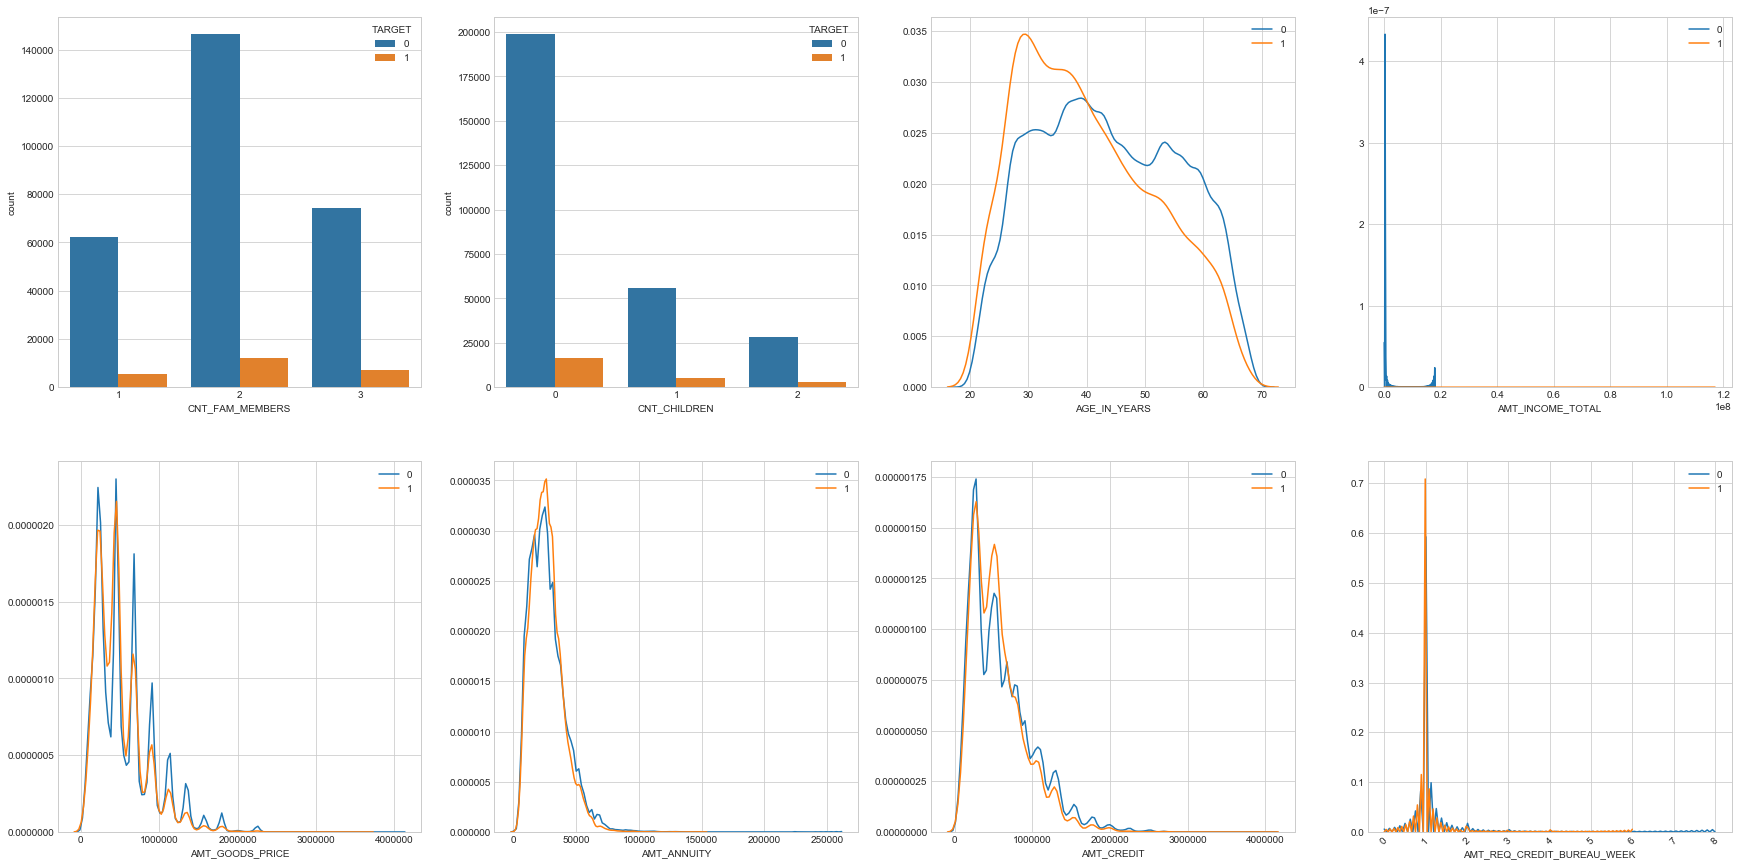

In [49]:
fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(30,15))
sns.countplot(x = 'CNT_FAM_MEMBERS', hue = 'TARGET', data = app_data2,  ax=axes[0][0])
plt.xticks(rotation = 45)

sns.countplot(x = 'CNT_CHILDREN', hue = 'TARGET', data = app_data2,  ax=axes[0][1])
plt.xticks(rotation = 45)

target = [0, 1]
for i in target:
    subset = app_data2[app_data2['TARGET']==i]
    sns.distplot(subset['AGE_IN_YEARS'], hist = False,  ax=axes[0][2], label = i)
    sns.distplot(subset['AMT_INCOME_TOTAL'], hist = False,  ax=axes[0][3], label = i)
    sns.distplot(subset['AMT_GOODS_PRICE'], hist = False,  ax=axes[1][0], label = i)
    sns.distplot(subset['AMT_ANNUITY'], hist = False,  ax=axes[1][1], label = i)
    sns.distplot(subset['AMT_REQ_CREDIT_BUREAU_WEEK'], hist = False,  ax=axes[1][3], label = i)
    sns.distplot(subset['AMT_CREDIT'], hist = False,  ax=axes[1][2], label = i)
    
    
    
    

In [50]:
app_data2_Tg_df0.TARGET = app_data2_Tg_df0.TARGET.astype(object)
app_data2_Tg_df1.TARGET = app_data2_Tg_df1.TARGET.astype(object)
app_data2_Tg_df0.SK_ID_CURR = app_data2_Tg_df0.SK_ID_CURR.astype(object)
app_data2_Tg_df1.SK_ID_CURR = app_data2_Tg_df1.SK_ID_CURR.astype(object)

app_data2_Tg_df0.FLAG_OWN_CAR  = app_data2_Tg_df0.FLAG_OWN_CAR .astype(object)
app_data2_Tg_df1.FLAG_OWN_CAR  = app_data2_Tg_df1.FLAG_OWN_CAR .astype(object)
app_data2_Tg_df0.FLAG_OWN_REALTY = app_data2_Tg_df0.FLAG_OWN_REALTY.astype(object)
app_data2_Tg_df1.FLAG_OWN_REALTY = app_data2_Tg_df1.FLAG_OWN_REALTY.astype(object)


app_data2_Tg_df0.FLAG_MOBIL  = app_data2_Tg_df0.FLAG_MOBIL .astype(object)
app_data2_Tg_df1.FLAG_MOBIL  = app_data2_Tg_df1.FLAG_MOBIL .astype(object)
app_data2_Tg_df0.FLAG_EMP_PHONE = app_data2_Tg_df0.FLAG_EMP_PHONE.astype(object)
app_data2_Tg_df1.FLAG_EMP_PHONE = app_data2_Tg_df1.FLAG_EMP_PHONE.astype(object)


app_data2_Tg_df0.FLAG_MOBIL  = app_data2_Tg_df0.FLAG_MOBIL .astype(object)
app_data2_Tg_df1.FLAG_MOBIL  = app_data2_Tg_df1.FLAG_MOBIL .astype(object)
app_data2_Tg_df0.FLAG_EMP_PHONE = app_data2_Tg_df0.FLAG_EMP_PHONE.astype(object)
app_data2_Tg_df1.FLAG_EMP_PHONE = app_data2_Tg_df1.FLAG_EMP_PHONE.astype(object)


app_data2_Tg_df0.FLAG_CONT_MOBILE  = app_data2_Tg_df0.FLAG_CONT_MOBILE .astype(object)
app_data2_Tg_df1.FLAG_CONT_MOBILE  = app_data2_Tg_df1.FLAG_CONT_MOBILE .astype(object)
app_data2_Tg_df0.FLAG_PHONE = app_data2_Tg_df0.FLAG_PHONE.astype(object)
app_data2_Tg_df1.FLAG_PHONE = app_data2_Tg_df1.FLAG_PHONE.astype(object)

app_data2_Tg_df0.FLAG_EMAIL  = app_data2_Tg_df0.FLAG_EMAIL .astype(object)
app_data2_Tg_df1.FLAG_EMAIL  = app_data2_Tg_df1.FLAG_EMAIL .astype(object)

In [51]:
app_data2_Tg_df0.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_CONT_MOBILE                 object
FLAG_PHONE                       object
FLAG_EMAIL                       object
OCCUPATION_TYPE                  object


Text(0.5,1,'Correlation of the data for Clients with no difficulty')

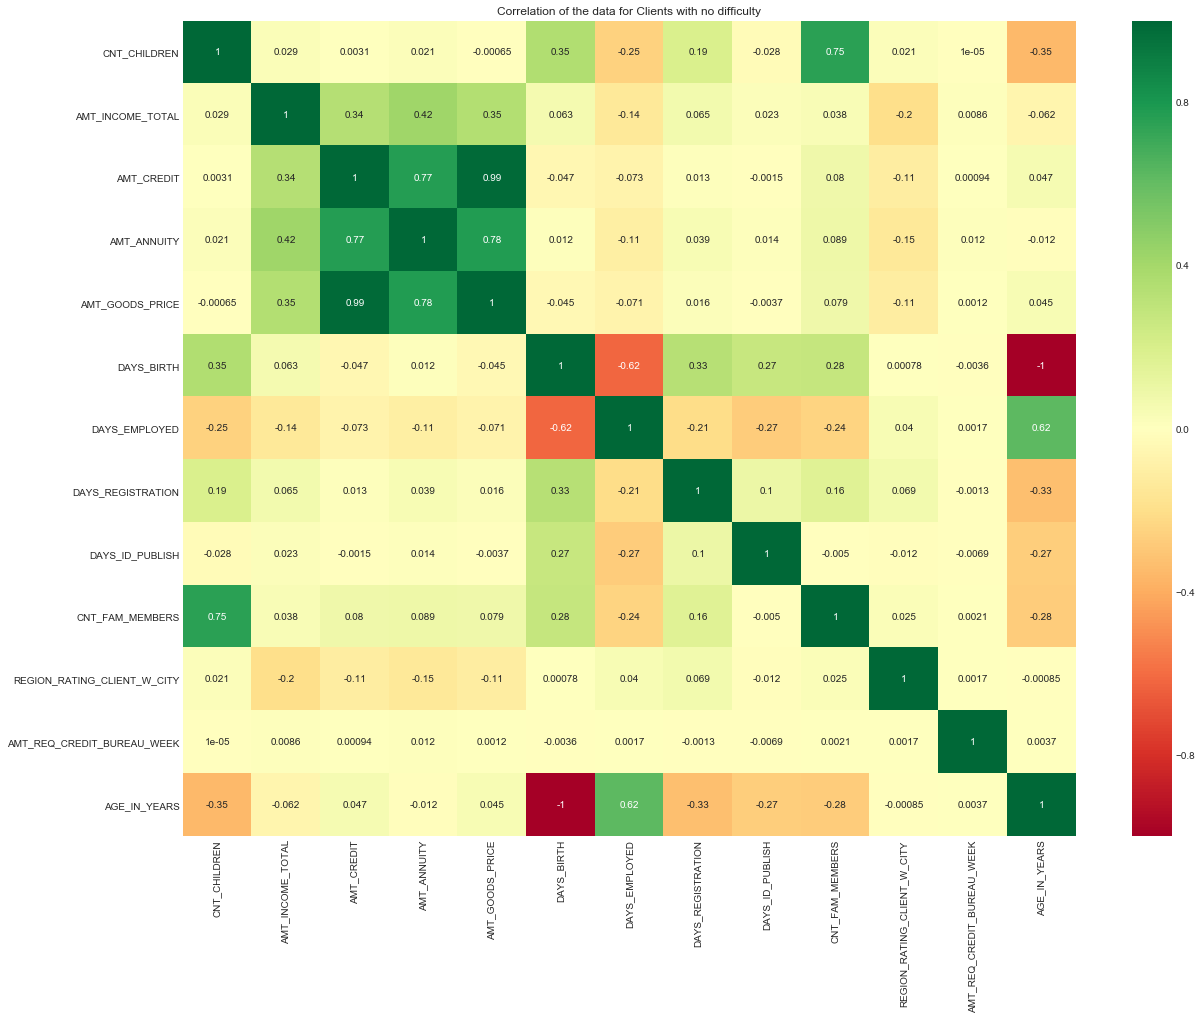

In [52]:
# Choosing the heatmap as the better plot to display the correlation 
# Heatmap to understand the correlation of target value-0 with respect to other variables in dataframe

corr = app_data2_Tg_df0.corr('pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation of the data for Clients with no difficulty")

In [53]:
corr_mat = app_data2_Tg_df0.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
#corr.style.background_gradient(cmap='Blues').set_precision(2)
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
161,AGE_IN_YEARS,DAYS_BIRTH,0.999711
54,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
55,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
41,AMT_ANNUITY,AMT_CREDIT,0.771297
117,CNT_FAM_MEMBERS,CNT_CHILDREN,0.751991
83,DAYS_EMPLOYED,DAYS_BIRTH,0.618048
162,AGE_IN_YEARS,DAYS_EMPLOYED,0.617967
40,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948
65,DAYS_BIRTH,CNT_CHILDREN,0.352559
156,AGE_IN_YEARS,CNT_CHILDREN,0.352516


#### Top 10 highly correlated variable in the df0 are:
    1. AGE_IN_YEARS - DAYS_BIRTH
    2. AMT_GOODS_PRICE - AMT_CREDIT
    3. CNT_FAM_MEMBERS - CNT_CHILDREN
    4. AMT_GOODS_PRICE - AMT_ANNUITY
    5. AMT_ANNUITY - AMT_CREDIT
    6. DAYS_EMPLOYED - DAYS_BIRTH
    7. AGE_IN_YEARS - DAYS_EMPLOYED
    8. AMT_ANNUITY - AMT_INCOME_TOTAL
    9. AMT_GOODS_PRICE - AMT_INCOME_TOTAL
    10. AMT_CREDIT - AMT_INCOME_TOTAL
    
#### Key take aways from this correlation are:
    1. Higher the Good Price for the loans the applicants are applying, higher is the credit they are in
    2. In the same way higher is the goods price the applicants are applying we have seen there they are having high annuity
    3. Higher their Income higher is their annuity and goods price and Credit they possess
  
    

In [54]:
app_data2_Tg_df1.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_CONT_MOBILE                 object
FLAG_PHONE                       object
FLAG_EMAIL                       object
OCCUPATION_TYPE                  object


Text(0.5,1,'Correlation of the data for Clients with difficulty')

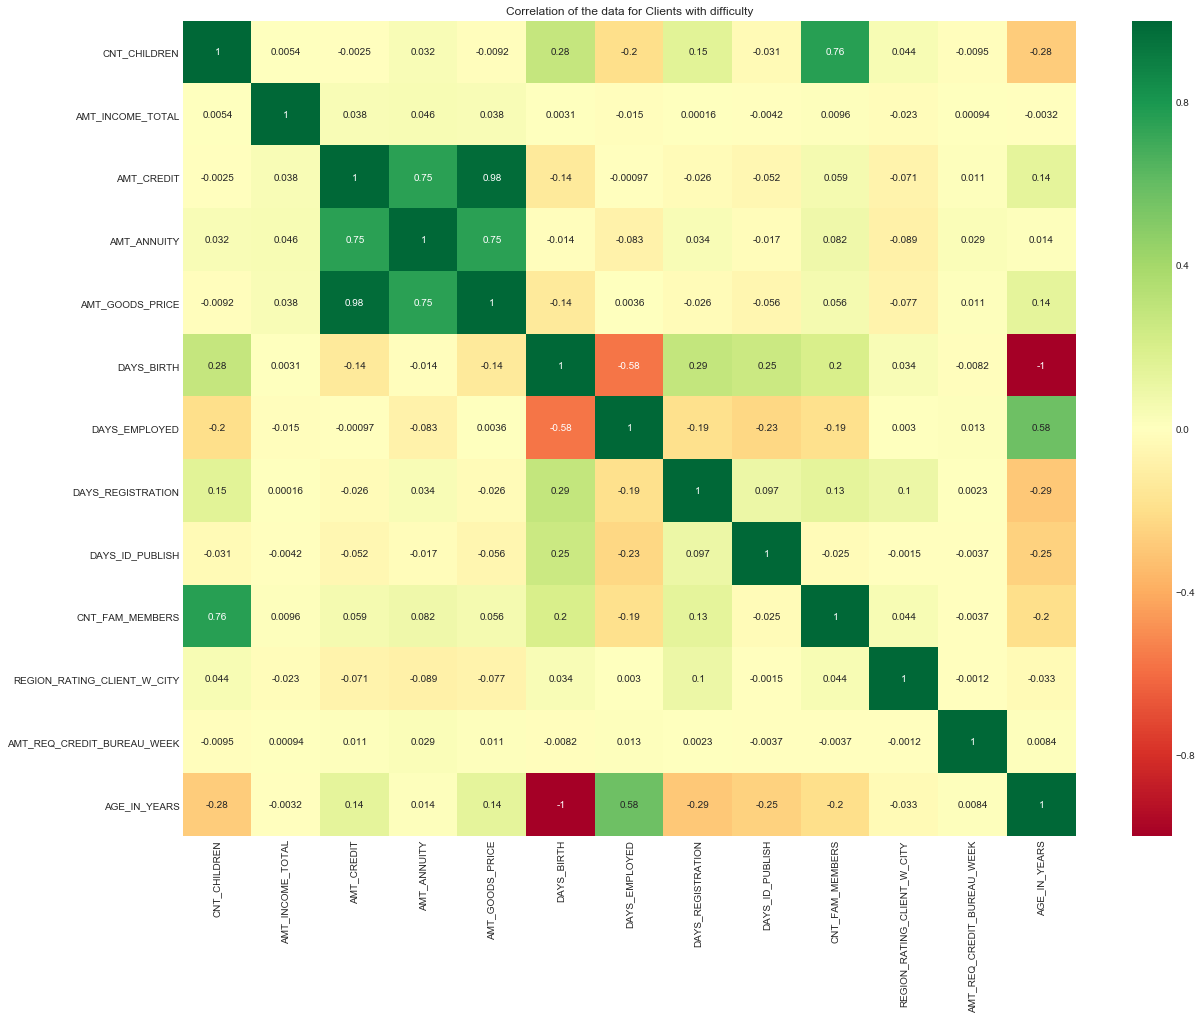

In [55]:
# Heatmap to understand the correlation of target value-1 with respect to other variables in dataframe

corr = app_data2_Tg_df1.corr('pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation of the data for Clients with difficulty")

In [56]:
corr_mat = app_data2_Tg_df1.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
#corr.style.background_gradient(cmap='Blues').set_precision(2)
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
161,AGE_IN_YEARS,DAYS_BIRTH,0.999691
54,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
117,CNT_FAM_MEMBERS,CNT_CHILDREN,0.760055
55,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
41,AMT_ANNUITY,AMT_CREDIT,0.752195
162,AGE_IN_YEARS,DAYS_EMPLOYED,0.575362
83,DAYS_EMPLOYED,DAYS_BIRTH,0.575097
163,AGE_IN_YEARS,DAYS_REGISTRATION,0.289116
96,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
156,AGE_IN_YEARS,CNT_CHILDREN,0.275712


#### Top 10 highly correlated variable in df1 are : AGE_IN_YEARS<->DAYS_BIRTH
    1. AMT_GOODS_PRICE - AMT_CREDIT
    2. CNT_FAM_MEMBERS - CNT_CHILDREN
    3. AMT_GOODS_PRICE - AMT_ANNUITY
    4. AMT_ANNUITY - AMT_CREDIT
    5. AGE_IN_YEARS - DAYS_EMPLOYED
    6. DAYS_EMPLOYED - DAYS_BIRTH
    7. AGE_IN_YEARS - DAYS_REGISTRATION
    8. DAYS_REGISTRATION - DAYS_BIRTH
    9. AGE_IN_YEARS - CNT_CHILDREN
    10. DAYS_REGISTRATION - DAYS_BIRTH
#### Key take aways from the correlation values where applicants face difficulty to repay the loan:
    1. Higher the Goods price they are also having the high Credit and Annuity
    2. Higher the Annuity they have higher Credit
    3. If we see here the correlation between the Income and Loan is not high that means people with relatively low income 
    are also taking more loans
  

## Previous Application Data:

In [57]:
prev_data = pd.read_csv('C:/Users/sakusuma/Desktop/pgdds/EDA Case Study/Sai EDA Asg/previous_application.csv')
print(prev_data.shape)

(1670214, 37)


In [58]:
prev_data = prev_data.add_suffix('_prev')

In [59]:
prev_data['SK_ID_CURR'] = prev_data['SK_ID_CURR_prev']

In [60]:
prev_data.head()

,SK_ID_PREV_prev,SK_ID_CURR_prev,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION_prev,AMT_CREDIT_prev,AMT_DOWN_PAYMENT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT_prev,NFLAG_LAST_APPL_IN_DAY_prev,RATE_DOWN_PAYMENT_prev,RATE_INTEREST_PRIMARY_prev,RATE_INTEREST_PRIVILEGED_prev,NAME_CASH_LOAN_PURPOSE_prev,NAME_CONTRACT_STATUS_prev,DAYS_DECISION_prev,NAME_PAYMENT_TYPE_prev,CODE_REJECT_REASON_prev,NAME_TYPE_SUITE_prev,NAME_CLIENT_TYPE_prev,NAME_GOODS_CATEGORY_prev,NAME_PORTFOLIO_prev,NAME_PRODUCT_TYPE_prev,CHANNEL_TYPE_prev,SELLERPLACE_AREA_prev,NAME_SELLER_INDUSTRY_prev,CNT_PAYMENT_prev,NAME_YIELD_GROUP_prev,PRODUCT_COMBINATION_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_LAST_DUE_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev,SK_ID_CURR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,271877
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,108129
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,122040
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,176158
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,202054


In [61]:
app_history = pd.merge(app_data2, prev_data, how = 'left', on = 'SK_ID_CURR')

In [62]:
app_history.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_WEEK,AGE_IN_YEARS,SK_ID_PREV_prev,SK_ID_CURR_prev,AMT_ANNUITY_prev,AMT_APPLICATION_prev,AMT_CREDIT_prev,AMT_DOWN_PAYMENT_prev,AMT_GOODS_PRICE_prev,HOUR_APPR_PROCESS_START_prev,NFLAG_LAST_APPL_IN_DAY_prev,RATE_DOWN_PAYMENT_prev,RATE_INTEREST_PRIMARY_prev,RATE_INTEREST_PRIVILEGED_prev,DAYS_DECISION_prev,SELLERPLACE_AREA_prev,CNT_PAYMENT_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_LAST_DUE_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.413701e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,8.624240e-02,3.874482e-01,1.736036e+05,5.893386e+05,2.704189e+04,5.293758e+05,-1.631495e+04,6.860209e+04,-5.001275e+03,-3.034492e+03,9.999993e-01,8.067175e-01,9.989917e-01,2.825792e-01,7.195793e-02,2.041734e+00,2.036176e+00,3.384039e-02,4.419713e+01,1.922744e+06,2.784813e+05,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028021e+05,2.807218e-01,6.596019e-01,1.983303e+05,3.874204e+05,1.403958e+04,3.556441e+05,4.346737e+03,1.451967e+05,3.551626e+03,1.507182e+03,8.361967e-04,3.948728e-01,3.173746e-02,4.502536e-01,2.584183e-01,6.850751e-01,4.891555e-01,2.009888e-01,1.190810e+01,5.327153e+05,1.028118e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,-2.522900e+04,-1.791200e+04,-2.467200e+04,-7.197000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,1.000001e+06,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893610e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,-1.997500e+04,-2.825000e+03,-7.509000e+03,-4.319000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,3.400000e+01,1.461346e+06,1.893640e+05,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,-1.603700e+04,-1.277000e+03,-4.506000e+03,-3.330000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,4.300000e+01,1.922698e+06,2.789920e+05,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675090e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.

In [63]:
app_history.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,BIN_AMT_GOODS_PRICE,BIN_AMT_CREDIT,BIN_AMT_ANNUITY,BIN_AMOUNT_INCOME_TOTAL,AGE_IN_YEARS,BIN_AGE_IN_YEARS,SK_ID_PREV_prev,SK_ID_CURR_prev,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION_prev,AMT_CREDIT_prev,AMT_DOWN_PAYMENT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT_prev,NFLAG_LAST_APPL_IN_DAY_prev,RATE_DOWN_PAYMENT_prev,RATE_INTEREST_PRIMARY_prev,RATE_INTEREST_PRIVILEGED_prev,NAME_CASH_LOAN_PURPOSE_prev,NAME_CONTRACT_STATUS_prev,DAYS_DECISION_prev,NAME_PAYMENT_TYPE_prev,CODE_REJECT_REASON_prev,NAME_TYPE_SUITE_prev,NAME_CLIENT_TYPE_prev,NAME_GOODS_CATEGORY_prev,NAME_PORTFOLIO_prev,NAME_PRODUCT_TYPE_prev,CHANNEL_TYPE_prev,SELLERPLACE_AREA_prev,NAME_SELLER_INDUSTRY_prev,CNT_PAYMENT_prev,NAME_YIELD_GROUP_prev,PRODUCT_COMBINATION_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_LAST_DUE_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,-2120,1,1,1,1,0,Laborers,1,2,Business Entity Type 3,0.0,250000-500000,250000-500000,10000-50000,100000-250000,25,20-30,1038818.0,100002.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,1,1,1,1,0,Core staff,2,1,School,0.0,1000000-1250000,1250000-1500000,10000-50000,250000-500000,45,40-50,1810518.0,100003.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,1,1,1,1,0,Core staff,2,1,School,0.0,1000000-1250000,1250000-1500000,10000-50000,250000-500000,45,40-50,2636178.0,100003.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,1,1,1,1,0,Core staff,2,1,School,0.0,1000000-1250000,1250000-1500000,10000-50000,250000-500000,45,40-50,2396755.0,100003.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,-2531,1,1,1,1,0,Laborers,1,2,Government,0.0,100000-250000,100000-250000,0 -10000,50000-100000,52,50-60,1564014.0,100004.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Appro

In [64]:
#Checking the data types:
app_history.dtypes

SK_ID_CURR                             int64
TARGET                                 int64
NAME_CONTRACT_TYPE                    object
CODE_GENDER                           object
FLAG_OWN_CAR                          object
FLAG_OWN_REALTY                       object
CNT_CHILDREN                           int64
AMT_INCOME_TOTAL                     float64
AMT_CREDIT                           float64
AMT_ANNUITY                          float64
AMT_GOODS_PRICE                      float64
NAME_INCOME_TYPE                      object
NAME_EDUCATION_TYPE                   object
NAME_FAMILY_STATUS                    object
NAME_HOUSING_TYPE                     object
DAYS_BIRTH                             int64
DAYS_EMPLOYED                          int64
DAYS_REGISTRATION                      int64
DAYS_ID_PUBLISH                        int64
FLAG_MOBIL                             int64
FLAG_EMP_PHONE                         int64
FLAG_CONT_MOBILE                       int64
FLAG_PHONE

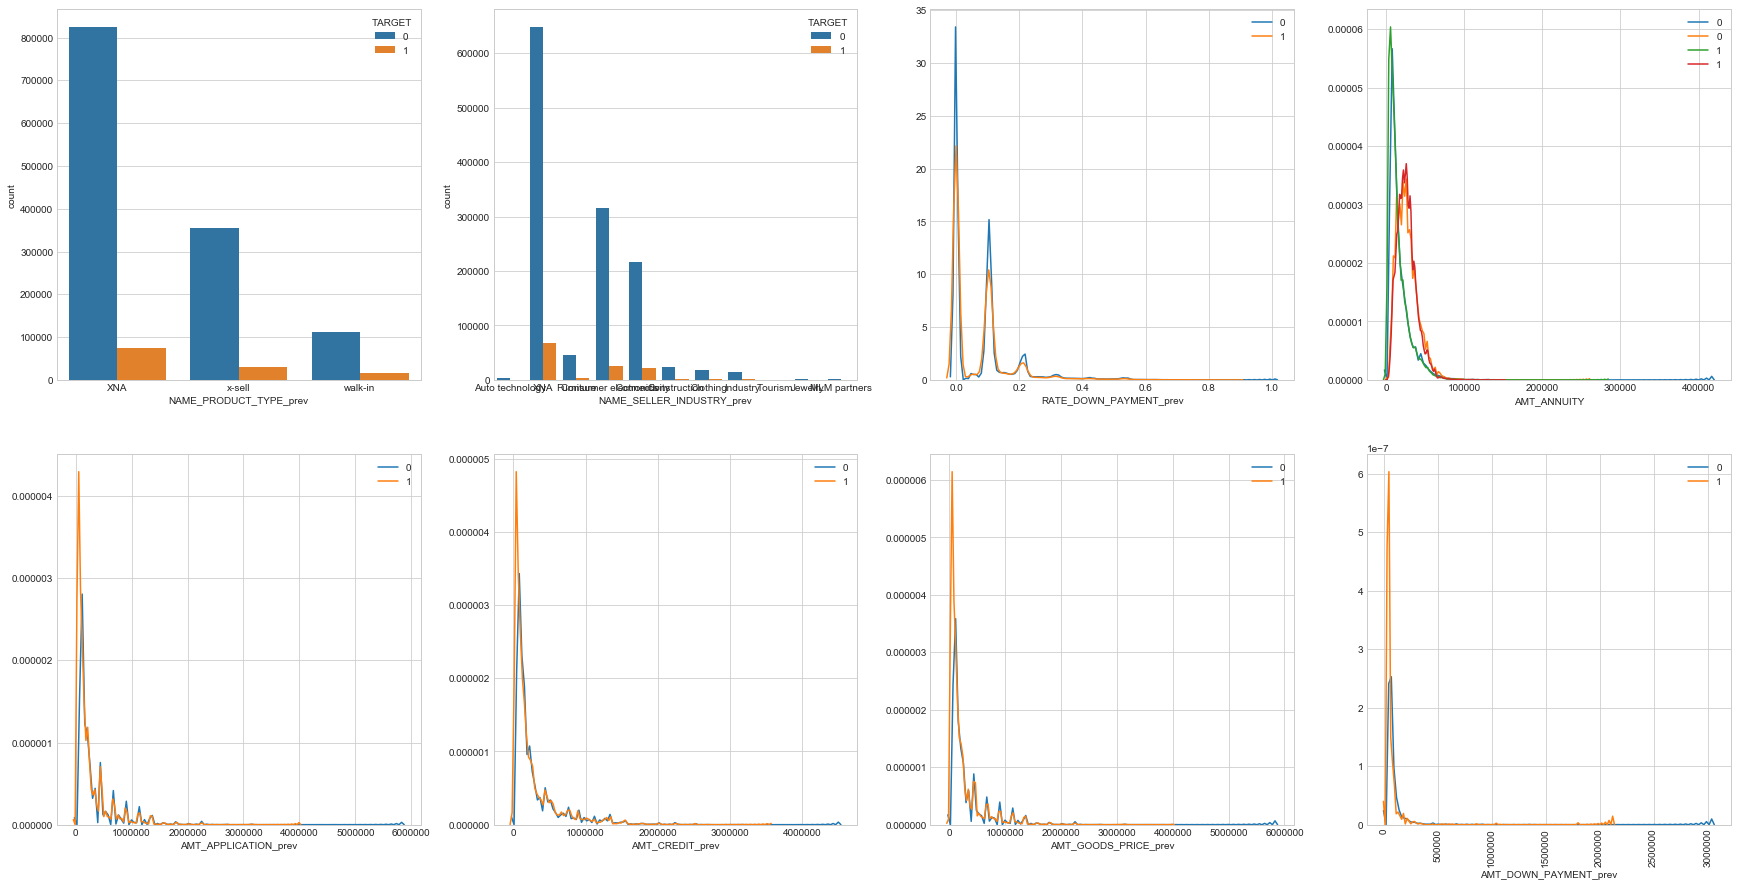

In [65]:
#Bivariate Analysis for the merged dataframes
fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(30,15))
sns.countplot(x = 'NAME_PRODUCT_TYPE_prev', hue = 'TARGET', data = app_history,  ax=axes[0][0])
plt.xticks(rotation = 45)

sns.countplot(x = 'NAME_SELLER_INDUSTRY_prev', hue = 'TARGET', data = app_history,  ax=axes[0][1])
plt.xticks(rotation = 90)

target = [0, 1]
for i in target:
    subset = app_history[app_history['TARGET']==i]
    sns.distplot(subset['RATE_DOWN_PAYMENT_prev'], hist = False,  ax=axes[0][2], label = i)
    sns.distplot(subset['AMT_ANNUITY_prev'], hist = False,  ax=axes[0][3], label = i)
    sns.distplot(subset['AMT_ANNUITY'], hist = False,  ax=axes[0][3], label = i)
    sns.distplot(subset['AMT_APPLICATION_prev'], hist = False,  ax=axes[1][0], label = i)
    sns.distplot(subset['AMT_CREDIT_prev'], hist = False,  ax=axes[1][1], label = i)
    sns.distplot(subset['AMT_GOODS_PRICE_prev'], hist = False,  ax=axes[1][2], label = i)
    sns.distplot(subset['AMT_DOWN_PAYMENT_prev'], hist = False,  ax=axes[1][3], label = i)




#### Observations for the Bivariate Analysis for the Merged DataFrame:
1. The Applicants who were having trouble repaying now are having a chance that they were in X-sell for a previous loan. This might be because we have sold the credit product which they might not require  
2. Appliocants who are having the Annutiy below the 100k in the history are most likely to have problem in repaying the loan, It could be possibly they might be taking the new loan for the annuity itself
3. Applicants who has taken loan amount below 500K previously are having trouble paying the loan now
4. If they have a credit history less than 5 Lakhs the chances are they might be having trouble in clearing the current loan
5. For the applicants who have taken loan less than 500K work of goods price might face problem in repaying the loan now
6. Applicants who has less down payment history has more chances of defaulting the loan or delaying the loan payment for current one

## Hypothesis:
1. From prior analysis on Age_In_Years, we can infer that the applicants around age of 30 are more inclined to default. - Assumption: This could be because of the less savings or inexperienced financial planning.

2. Applicants who might delay the repayment, most of the are in the income range between 100K to 250K (who fall under non-taxable bracket in India).

3. Applicants with higher Income could have reactively higher credit and annuity but chances of them defaulting/ late payment is less.

4. The price of Goods for which they are taking the loan is in the range of 100K, 750K (1 to 3 times of the income earned).

5. From prior analysis, the correlation between the Income and Loan is not high which meant that the people with relatively low income are also taking more loans.
6. As analyzed the Number of queries being sent to the credit bureau, we can infer that whenever there are more queries, the applicants have more difficulty in repaying the loan. This means when bank wanted to query more times for credit score and finally got the loan disbursed the chances are the applicant might default is high
7. The Applicants who were having trouble repaying now are having a chance that they were in X-sell for a previous loan. Assumption: This might be because we have sold the financial product which they might not require.


    